In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers, models
import scipy.io


In [ ]:
data_path = '/content/drive/My Drive/car_classification'
train_path = data_path + '/cars_train/cars_train'
test_path = data_path + '/cars_test/cars_test'
mat_path = data_path + '/cars_annos.mat'
train_mat = data_path + '/cars_train_annos.mat'
test_mat = data_path + '/cars_test_annos_withlabels.mat'
model_path = data_path + '/resnet50_custom_model.h5'

In [ ]:
# Load class labels from .mat file

mat_data = scipy.io.loadmat(train_mat)


# Extract annotations
image_mapping = mat_data['annotations'] # Access the first level of the array

# Extract filenames and their corresponding labels
train_images_with_labels = [(mapping[0][0], mapping[5][0][0]) for mapping in image_mapping]
# Assuming:
# - mapping[0][0] contains the file name
# - mapping[5][0][0] contains the label (class ID)

# Print the total number of training images
print(f"Number of training images: {len(train_images_with_labels)}")
image_mapping

Number of training images: 1


array([[(array([[39]], dtype=uint8), array([[116]], dtype=uint8), array([[569]], dtype=uint16), array([[375]], dtype=uint16), array([[14]], dtype=uint8), array(['00001.jpg'], dtype='<U9')),
        (array([[36]], dtype=uint8), array([[116]], dtype=uint8), array([[868]], dtype=uint16), array([[587]], dtype=uint16), array([[3]], dtype=uint8), array(['00002.jpg'], dtype='<U9')),
        (array([[85]], dtype=uint8), array([[109]], dtype=uint8), array([[601]], dtype=uint16), array([[381]], dtype=uint16), array([[91]], dtype=uint8), array(['00003.jpg'], dtype='<U9')),
        ...,
        (array([[26]], dtype=uint8), array([[246]], dtype=uint8), array([[660]], dtype=uint16), array([[449]], dtype=uint16), array([[163]], dtype=uint8), array(['08142.jpg'], dtype='<U9')),
        (array([[78]], dtype=uint8), array([[526]], dtype=uint16), array([[1489]], dtype=uint16), array([[908]], dtype=uint16), array([[112]], dtype=uint8), array(['08143.jpg'], dtype='<U9')),
        (array([[20]], dtype=uint8

In [ ]:
import scipy.io



# Load the .mat files
train_data = scipy.io.loadmat(train_mat)
test_data = scipy.io.loadmat(test_mat)

# Extract annotations for both train and test
train_image_mapping = train_data['annotations'][0]
test_image_mapping = test_data['annotations'][0]

# Create train_annos and test_annos by extracting the relevant data
train_annos = [
    {
        'bbox_x1': mapping[0][0][0],
        'bbox_y1': mapping[1][0][0],
        'bbox_x2': mapping[2][0][0],
        'bbox_y2': mapping[3][0][0],
        'class': mapping[4][0][0],
        'fname': mapping[5][0]
    }
    for mapping in train_image_mapping
]

test_annos = [
    {
        'bbox_x1': mapping[0][0][0],
        'bbox_y1': mapping[1][0][0],
        'bbox_x2': mapping[2][0][0],
        'bbox_y2': mapping[3][0][0],
        'class': mapping[4][0][0],
        'fname': mapping[5][0]
    }
    for mapping in test_image_mapping
]

# Print the number of annotations in both sets
print(f"Number of training annotations: {len(train_annos)}")
print(f"Number of testing annotations: {len(test_annos)}")

# Print the first 5 annotations for train and test
print(f"First 5 training annotations: {train_annos[:5]}")
print(f"Last 5 testing annotations: {test_annos[:5]}")


Number of training annotations: 8144
Number of testing annotations: 8041
First 5 training annotations: [{'bbox_x1': 39, 'bbox_y1': 116, 'bbox_x2': 569, 'bbox_y2': 375, 'class': 14, 'fname': '00001.jpg'}, {'bbox_x1': 36, 'bbox_y1': 116, 'bbox_x2': 868, 'bbox_y2': 587, 'class': 3, 'fname': '00002.jpg'}, {'bbox_x1': 85, 'bbox_y1': 109, 'bbox_x2': 601, 'bbox_y2': 381, 'class': 91, 'fname': '00003.jpg'}, {'bbox_x1': 621, 'bbox_y1': 393, 'bbox_x2': 1484, 'bbox_y2': 1096, 'class': 134, 'fname': '00004.jpg'}, {'bbox_x1': 14, 'bbox_y1': 36, 'bbox_x2': 133, 'bbox_y2': 99, 'class': 106, 'fname': '00005.jpg'}]
Last 5 testing annotations: [{'bbox_x1': 30, 'bbox_y1': 52, 'bbox_x2': 246, 'bbox_y2': 147, 'class': 181, 'fname': '00001.jpg'}, {'bbox_x1': 100, 'bbox_y1': 19, 'bbox_x2': 576, 'bbox_y2': 203, 'class': 103, 'fname': '00002.jpg'}, {'bbox_x1': 51, 'bbox_y1': 105, 'bbox_x2': 968, 'bbox_y2': 659, 'class': 145, 'fname': '00003.jpg'}, {'bbox_x1': 67, 'bbox_y1': 84, 'bbox_x2': 581, 'bbox_y2': 407, 

In [ ]:
import os

# Define the base paths
train_image_dir = train_path
test_image_dir = test_path

# Print the file paths and labels for the first few training and testing samples
print("Training samples with file paths and labels:")
for i, anno in enumerate(train_annos[:10]):  # Print the first 10 training samples
    file_path = os.path.join(train_image_dir, anno['fname'])
    label = anno['class']  # Extract the class label
    print(f"Sample {i+1}: File Path: {file_path}, Label: {label}")

print("\nTesting samples with file paths and labels:")
for i, anno in enumerate(test_annos[:10]):  # Print the first 10 testing samples
    file_path = os.path.join(test_image_dir, anno['fname'])
    label = anno['class']  # Extract the class label
    print(f"Sample {i+1}: File Path: {file_path}, Label: {label}")


Training samples with file paths and labels:
Sample 1: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00001.jpg, Label: 14
Sample 2: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00002.jpg, Label: 3
Sample 3: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00003.jpg, Label: 91
Sample 4: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00004.jpg, Label: 134
Sample 5: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00005.jpg, Label: 106
Sample 6: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00006.jpg, Label: 123
Sample 7: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00007.jpg, Label: 89
Sample 8: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00008.jpg, Label: 96
Sample 9: File Path: /content/drive/My Drive/car_classification/cars_train/cars_train/00009.jpg, 

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.applications.resnet50 import preprocess_input

# Extract data based on train and test annotations
def create_dataset(annos, image_dir, target_size, batch_size, augment=True):
    file_paths = []
    labels = []

    for anno in annos:
        file_name = anno['fname']
        class_label = anno['class'] - 1  # Adjust class index (1-based to 0-based)
        file_paths.append(os.path.join(image_dir, file_name))
        labels.append(class_label)

    # Create a TensorFlow dataset
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))

    # Load and preprocess images
    def preprocess(file_path, label):
        image = tf.io.read_file(file_path)
        image = tf.image.decode_jpeg(image, channels=3)
        image = tf.image.resize(image, target_size)

        # Use ResNet50 preprocessing
        image = preprocess_input(image)  # This scales the image to [-1, 1]

        if augment:
            image = augment_image(image)  # Apply augmentations

        return image, tf.one_hot(label, depth=196)  # Assuming 196 classes

    dataset = dataset.map(preprocess).batch(batch_size).shuffle(len(file_paths))
    return dataset

# Augmentation function
def augment_image(image):
    # Apply random augmentations
    image = tf.image.random_flip_left_right(image)  # Horizontal flip
    image = tf.image.random_brightness(image, max_delta=0.1)  # Brightness adjustment
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Contrast adjustment
    image = tf.image.resize_with_crop_or_pad(image, target_size[0] + 20, target_size[1] + 20)  # Add padding
    image = tf.image.random_crop(image, size=target_size + (3,))  # Random crop
    return image

# Define dataset parameters
target_size = (128, 128)  # Resize to 128x128
batch_size = 64           # Batch size

# Create datasets
train_dataset = create_dataset(train_annos, train_path, target_size, batch_size)
#test_dataset = create_dataset(test_annos, test_path, target_size, batch_size)

print(len(train_dataset))


128


In [ ]:
# import matplotlib.pyplot as plt
# from tensorflow.keras.applications import resnet50
# import tensorflow as tf

# # Iterate through the dataset and view the first 3 images
# for image, label in train_dataset.take(1):  # Take the first 3 images
#     plt.figure()
#     image = image[0].numpy()  # Select the first image from the batch

#     # Resize to the required size for ResNet50
#     image_resized = tf.image.resize(image, (224, 224))

#     # Preprocess the image for ResNet50
#     image_resized = resnet50.preprocess_input(image_resized)

#     # Denormalize the image for visualization (reverse the preprocessing)
#     image_denormalized = (image_resized + 1) * 127.5  # Rescale to [0, 255]

#     # Clip the values to be in the [0, 255] range
#     image_denormalized = tf.clip_by_value(image_denormalized, 0, 255).numpy()

#     # Display the denormalized image
#     plt.imshow(image_denormalized.astype("uint8"))
#     plt.title(f"Label: {label[0]}")  # Assuming label is in the format of a tensor
#     plt.axis("off")
#     plt.show()


In [ ]:
# # Print the total number of samples
# #print(f"Total number of samples: {len(file_paths)}")

# # Alternatively, count samples from the dataset
# total_samples = sum(1 for _ in train_dataset.unbatch())
# print(f"Total number of samples in dataset: {total_samples}")


In [ ]:

total_samples = 8144

# Define split ratio (e.g., 80% for training, 20% for validation)
train_size = int(0.8 * total_samples)

# Shuffle the dataset before splitting
shuffled_dataset = train_dataset.unbatch().shuffle(total_samples)

# Split the dataset
train_data = shuffled_dataset.take(train_size).batch(batch_size)
val_data = shuffled_dataset.skip(train_size).batch(batch_size)

val_samples = total_samples - train_size

# Print sizes
print(f"Train dataset size: {train_size}")
print(f"Validation dataset size: {val_samples}")


Train dataset size: 6515
Validation dataset size: 1629


In [ ]:
# Extract unique class labels from your dataset
unique_classes = set([anno['class'] for anno in train_annos])
num_classes = len(unique_classes)

print(f"Number of unique classes: {num_classes}")


Number of unique classes: 196


In [ ]:
#total_samples = sum(1 for _ in train_dataset.unbatch())

print(total_samples)


8144


GPU in use: /device:GPU:0
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Epoch 1/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 1/20


Epoch 1/20:   1%|          | 1/127 [1:39:57<209:54:25, 5997.34s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.0117 - loss: 6.1579        

Epoch 1/20:   3%|▎         | 4/127 [1:39:57<38:46:04, 1134.67s/it] 

  5/127 ━━━━━━━━━━━━━━━━━━━━ 6s 53ms/step - accuracy: 0.0078 - loss: 6.3841

Epoch 1/20:   5%|▍         | 6/127 [1:39:57<21:31:14, 640.29s/it] 

  7/127 ━━━━━━━━━━━━━━━━━━━━ 6s 54ms/step - accuracy: 0.0089 - loss: 6.3733

Epoch 1/20:   6%|▋         | 8/127 [1:39:57<13:02:44, 394.66s/it]

  9/127 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.0118 - loss: 6.3286

Epoch 1/20:   8%|▊         | 10/127 [1:39:57<8:17:09, 254.95s/it]

 11/127 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.0140 - loss: 6.2784

Epoch 1/20:   9%|▉         | 12/127 [1:39:57<5:24:33, 169.34s/it]

 13/127 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.0151 - loss: 6.2284

Epoch 1/20:  11%|█         | 14/127 [1:39:58<3:35:32, 114.45s/it]

 15/127 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.0158 - loss: 6.1797

Epoch 1/20:  13%|█▎        | 16/127 [1:39:58<2:24:43, 78.23s/it] 

 17/127 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.0165 - loss: 6.1341

Epoch 1/20:  14%|█▍        | 18/127 [1:39:58<1:37:54, 53.89s/it]

 19/127 ━━━━━━━━━━━━━━━━━━━━ 6s 56ms/step - accuracy: 0.0174 - loss: 6.0921

Epoch 1/20:  16%|█▌        | 20/127 [1:39:58<1:06:32, 37.32s/it]

 21/127 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.0182 - loss: 6.0520

Epoch 1/20:  17%|█▋        | 22/127 [1:39:58<45:22, 25.93s/it]  

 23/127 ━━━━━━━━━━━━━━━━━━━━ 5s 56ms/step - accuracy: 0.0192 - loss: 6.0128

Epoch 1/20:  19%|█▉        | 24/127 [1:40:02<31:55, 18.60s/it]

 24/127 ━━━━━━━━━━━━━━━━━━━━ 21s 206ms/step - accuracy: 0.0196 - loss: 5.9949

Epoch 1/20:  20%|██        | 26/127 [1:40:02<21:51, 12.98s/it]

 27/127 ━━━━━━━━━━━━━━━━━━━━ 18s 189ms/step - accuracy: 0.0207 - loss: 5.9447

Epoch 1/20:  22%|██▏       | 28/127 [1:40:02<14:59,  9.08s/it]

 29/127 ━━━━━━━━━━━━━━━━━━━━ 17s 179ms/step - accuracy: 0.0214 - loss: 5.9137

Epoch 1/20:  24%|██▎       | 30/127 [1:40:02<10:17,  6.36s/it]

 31/127 ━━━━━━━━━━━━━━━━━━━━ 16s 171ms/step - accuracy: 0.0220 - loss: 5.8850

Epoch 1/20:  25%|██▌       | 32/127 [1:40:02<07:04,  4.46s/it]

 33/127 ━━━━━━━━━━━━━━━━━━━━ 15s 164ms/step - accuracy: 0.0226 - loss: 5.8578

Epoch 1/20:  27%|██▋       | 34/127 [1:40:02<04:51,  3.14s/it]

 35/127 ━━━━━━━━━━━━━━━━━━━━ 14s 157ms/step - accuracy: 0.0231 - loss: 5.8323

Epoch 1/20:  28%|██▊       | 36/127 [1:40:02<03:21,  2.21s/it]

 37/127 ━━━━━━━━━━━━━━━━━━━━ 13s 152ms/step - accuracy: 0.0236 - loss: 5.8082

Epoch 1/20:  30%|██▉       | 38/127 [1:40:02<02:19,  1.56s/it]

 39/127 ━━━━━━━━━━━━━━━━━━━━ 12s 147ms/step - accuracy: 0.0241 - loss: 5.7852

Epoch 1/20:  31%|███▏      | 40/127 [1:40:02<01:36,  1.11s/it]

 41/127 ━━━━━━━━━━━━━━━━━━━━ 12s 142ms/step - accuracy: 0.0246 - loss: 5.7632

Epoch 1/20:  33%|███▎      | 42/127 [1:40:03<01:07,  1.26it/s]

 43/127 ━━━━━━━━━━━━━━━━━━━━ 11s 138ms/step - accuracy: 0.0250 - loss: 5.7421

Epoch 1/20:  35%|███▍      | 44/127 [1:40:03<00:47,  1.74it/s]

 45/127 ━━━━━━━━━━━━━━━━━━━━ 11s 134ms/step - accuracy: 0.0255 - loss: 5.7216

Epoch 1/20:  36%|███▌      | 46/127 [1:40:03<00:33,  2.39it/s]

 47/127 ━━━━━━━━━━━━━━━━━━━━ 10s 131ms/step - accuracy: 0.0259 - loss: 5.7019

Epoch 1/20:  38%|███▊      | 48/127 [1:40:03<00:24,  3.23it/s]

 49/127 ━━━━━━━━━━━━━━━━━━━━ 9s 128ms/step - accuracy: 0.0265 - loss: 5.6828 

Epoch 1/20:  39%|███▉      | 50/127 [1:40:03<00:17,  4.29it/s]

 51/127 ━━━━━━━━━━━━━━━━━━━━ 9s 125ms/step - accuracy: 0.0269 - loss: 5.6646

Epoch 1/20:  41%|████      | 52/127 [1:40:03<00:13,  5.55it/s]

 53/127 ━━━━━━━━━━━━━━━━━━━━ 9s 122ms/step - accuracy: 0.0274 - loss: 5.6471

Epoch 1/20:  43%|████▎     | 54/127 [1:40:03<00:10,  6.99it/s]

 55/127 ━━━━━━━━━━━━━━━━━━━━ 8s 120ms/step - accuracy: 0.0278 - loss: 5.6301

Epoch 1/20:  44%|████▍     | 56/127 [1:40:03<00:08,  8.55it/s]

 57/127 ━━━━━━━━━━━━━━━━━━━━ 8s 118ms/step - accuracy: 0.0283 - loss: 5.6136

Epoch 1/20:  46%|████▌     | 58/127 [1:40:03<00:06, 10.07it/s]

 59/127 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.0287 - loss: 5.5975

Epoch 1/20:  47%|████▋     | 60/127 [1:40:04<00:05, 11.54it/s]

 61/127 ━━━━━━━━━━━━━━━━━━━━ 7s 114ms/step - accuracy: 0.0292 - loss: 5.5819

Epoch 1/20:  49%|████▉     | 62/127 [1:40:04<00:05, 12.75it/s]

 63/127 ━━━━━━━━━━━━━━━━━━━━ 7s 112ms/step - accuracy: 0.0296 - loss: 5.5664

Epoch 1/20:  50%|█████     | 64/127 [1:40:04<00:04, 13.78it/s]

 65/127 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.0301 - loss: 5.5513

Epoch 1/20:  52%|█████▏    | 66/127 [1:40:04<00:04, 14.55it/s]

 67/127 ━━━━━━━━━━━━━━━━━━━━ 6s 109ms/step - accuracy: 0.0305 - loss: 5.5369

Epoch 1/20:  54%|█████▎    | 68/127 [1:40:04<00:03, 15.15it/s]

 69/127 ━━━━━━━━━━━━━━━━━━━━ 6s 107ms/step - accuracy: 0.0309 - loss: 5.5229

Epoch 1/20:  55%|█████▌    | 70/127 [1:40:04<00:03, 15.69it/s]

 71/127 ━━━━━━━━━━━━━━━━━━━━ 5s 106ms/step - accuracy: 0.0313 - loss: 5.5092

Epoch 1/20:  57%|█████▋    | 72/127 [1:40:04<00:03, 16.20it/s]

 73/127 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.0318 - loss: 5.4959

Epoch 1/20:  58%|█████▊    | 74/127 [1:40:04<00:03, 16.35it/s]

 75/127 ━━━━━━━━━━━━━━━━━━━━ 5s 103ms/step - accuracy: 0.0322 - loss: 5.4829

Epoch 1/20:  60%|█████▉    | 76/127 [1:40:05<00:03, 16.51it/s]

 77/127 ━━━━━━━━━━━━━━━━━━━━ 5s 102ms/step - accuracy: 0.0327 - loss: 5.4700

Epoch 1/20:  61%|██████▏   | 78/127 [1:40:05<00:02, 16.64it/s]

 79/127 ━━━━━━━━━━━━━━━━━━━━ 4s 101ms/step - accuracy: 0.0331 - loss: 5.4576

Epoch 1/20:  63%|██████▎   | 80/127 [1:40:05<00:02, 16.82it/s]

 81/127 ━━━━━━━━━━━━━━━━━━━━ 4s 100ms/step - accuracy: 0.0336 - loss: 5.4456

Epoch 1/20:  65%|██████▍   | 82/127 [1:40:05<00:02, 17.04it/s]

 83/127 ━━━━━━━━━━━━━━━━━━━━ 4s 99ms/step - accuracy: 0.0340 - loss: 5.4337

Epoch 1/20:  66%|██████▌   | 84/127 [1:40:05<00:02, 17.07it/s]

 85/127 ━━━━━━━━━━━━━━━━━━━━ 4s 98ms/step - accuracy: 0.0345 - loss: 5.4221

Epoch 1/20:  68%|██████▊   | 86/127 [1:40:05<00:02, 16.98it/s]

 87/127 ━━━━━━━━━━━━━━━━━━━━ 3s 97ms/step - accuracy: 0.0349 - loss: 5.4107

Epoch 1/20:  69%|██████▉   | 88/127 [1:40:05<00:02, 16.80it/s]

 89/127 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.0354 - loss: 5.3995

Epoch 1/20:  71%|███████   | 90/127 [1:40:05<00:02, 16.75it/s]

 91/127 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.0359 - loss: 5.3885

Epoch 1/20:  72%|███████▏  | 92/127 [1:40:05<00:02, 16.69it/s]

 93/127 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 0.0364 - loss: 5.3777

Epoch 1/20:  74%|███████▍  | 94/127 [1:40:06<00:01, 16.93it/s]

 95/127 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 0.0369 - loss: 5.3670

Epoch 1/20:  76%|███████▌  | 96/127 [1:40:06<00:01, 17.12it/s]

 97/127 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.0374 - loss: 5.3565

Epoch 1/20:  77%|███████▋  | 98/127 [1:40:06<00:01, 17.08it/s]

 99/127 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0379 - loss: 5.3461

Epoch 1/20:  79%|███████▊  | 100/127 [1:40:06<00:01, 17.08it/s]

101/127 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0384 - loss: 5.3358

Epoch 1/20:  80%|████████  | 102/127 [1:40:06<00:01, 17.10it/s]

103/127 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.0389 - loss: 5.3257

Epoch 1/20:  82%|████████▏ | 104/127 [1:40:06<00:01, 17.21it/s]

105/127 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.0395 - loss: 5.3157

Epoch 1/20:  83%|████████▎ | 106/127 [1:40:06<00:01, 17.07it/s]

107/127 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.0400 - loss: 5.3060

Epoch 1/20:  85%|████████▌ | 108/127 [1:40:06<00:01, 16.96it/s]

109/127 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.0405 - loss: 5.2963

Epoch 1/20:  87%|████████▋ | 110/127 [1:40:07<00:00, 17.02it/s]

111/127 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.0410 - loss: 5.2868

Epoch 1/20:  88%|████████▊ | 112/127 [1:40:07<00:00, 17.08it/s]

113/127 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.0415 - loss: 5.2774

Epoch 1/20:  90%|████████▉ | 114/127 [1:40:07<00:00, 17.10it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.0419 - loss: 5.2683

Epoch 1/20:  91%|█████████▏| 116/127 [1:40:07<00:00, 17.01it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0424 - loss: 5.2592

Epoch 1/20:  93%|█████████▎| 118/127 [1:40:07<00:00, 17.11it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - accuracy: 0.0429 - loss: 5.2503

Epoch 1/20:  94%|█████████▍| 120/127 [1:40:07<00:00, 17.14it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.0433 - loss: 5.2415

Epoch 1/20:  96%|█████████▌| 122/127 [1:40:07<00:00, 17.13it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.0438 - loss: 5.2329

Epoch 1/20:  98%|█████████▊| 124/127 [1:40:07<00:00, 16.91it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.0442 - loss: 5.2242

Epoch 1/20:  99%|█████████▉| 126/127 [1:40:07<00:00, 16.77it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.0447 - loss: 5.2158

Epoch 1/20: 100%|██████████| 127/127 [1:41:09<00:00, 47.79s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 6069s 572ms/step - accuracy: 0.0449 - loss: 5.2116 - val_accuracy: 0.1681 - val_loss: 3.6761 - learning_rate: 0.0010



Epoch 2/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 2/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.0625 - loss: 3.9587

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
Epoch 2/20:   1%|          | 1/127 [00:02<06:03,  2.89s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.0625 - loss: 3.9587 - val_accuracy: 0.2414 - val_loss: 3.4027 - learning_rate: 0.0010



Epoch 3/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 3/20


Epoch 3/20:   1%|          | 1/127 [01:10<2:27:30, 70.24s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.1992 - loss: 3.5829   

Epoch 3/20:   2%|▏         | 3/127 [01:10<37:45, 18.27s/it]  

  4/127 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.1963 - loss: 3.5646

Epoch 3/20:   4%|▍         | 5/127 [01:10<18:06,  8.91s/it]

  6/127 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.1934 - loss: 3.5730

Epoch 3/20:   6%|▌         | 7/127 [01:10<10:19,  5.16s/it]

  8/127 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.1922 - loss: 3.5808

Epoch 3/20:   7%|▋         | 9/127 [01:10<06:22,  3.24s/it]

 10/127 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.1919 - loss: 3.5878

Epoch 3/20:   9%|▊         | 11/127 [01:10<04:06,  2.12s/it]

 12/127 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.1918 - loss: 3.5925

Epoch 3/20:  10%|█         | 13/127 [01:10<02:43,  1.44s/it]

 14/127 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.1921 - loss: 3.5919

Epoch 3/20:  12%|█▏        | 15/127 [01:11<01:51,  1.01it/s]

 16/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1932 - loss: 3.5890

Epoch 3/20:  13%|█▎        | 17/127 [01:11<01:16,  1.43it/s]

 18/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1947 - loss: 3.5844

Epoch 3/20:  15%|█▍        | 19/127 [01:11<00:53,  2.00it/s]

 20/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1959 - loss: 3.5800

Epoch 3/20:  17%|█▋        | 21/127 [01:11<00:38,  2.75it/s]

 22/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1967 - loss: 3.5764

Epoch 3/20:  18%|█▊        | 23/127 [01:11<00:28,  3.69it/s]

 24/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.1971 - loss: 3.5738

Epoch 3/20:  20%|█▉        | 25/127 [01:11<00:21,  4.84it/s]

 26/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.1973 - loss: 3.5721

Epoch 3/20:  21%|██▏       | 27/127 [01:11<00:16,  6.18it/s]

 28/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1973 - loss: 3.5713

Epoch 3/20:  23%|██▎       | 29/127 [01:11<00:12,  7.63it/s]

 30/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1972 - loss: 3.5707

Epoch 3/20:  24%|██▍       | 31/127 [01:12<00:10,  9.13it/s]

 32/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1971 - loss: 3.5710

Epoch 3/20:  26%|██▌       | 33/127 [01:12<00:08, 10.61it/s]

 34/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1970 - loss: 3.5714

Epoch 3/20:  28%|██▊       | 35/127 [01:12<00:07, 11.93it/s]

 36/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1967 - loss: 3.5722

Epoch 3/20:  29%|██▉       | 37/127 [01:12<00:06, 13.18it/s]

 38/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1965 - loss: 3.5729

Epoch 3/20:  31%|███       | 39/127 [01:12<00:06, 14.12it/s]

 40/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1962 - loss: 3.5734

Epoch 3/20:  32%|███▏      | 41/127 [01:12<00:05, 15.01it/s]

 42/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.1959 - loss: 3.5736

Epoch 3/20:  34%|███▍      | 43/127 [01:12<00:05, 15.79it/s]

 44/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.1956 - loss: 3.5736

Epoch 3/20:  35%|███▌      | 45/127 [01:12<00:05, 16.26it/s]

 46/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1954 - loss: 3.5735

Epoch 3/20:  37%|███▋      | 47/127 [01:12<00:04, 16.77it/s]

 48/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1951 - loss: 3.5733

Epoch 3/20:  39%|███▊      | 49/127 [01:13<00:04, 16.92it/s]

 50/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1949 - loss: 3.5733

Epoch 3/20:  40%|████      | 51/127 [01:13<00:04, 17.20it/s]

 52/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1947 - loss: 3.5733

Epoch 3/20:  42%|████▏     | 53/127 [01:13<00:04, 17.31it/s]

 54/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1945 - loss: 3.5730

Epoch 3/20:  43%|████▎     | 55/127 [01:13<00:04, 17.45it/s]

 56/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1944 - loss: 3.5723

Epoch 3/20:  45%|████▍     | 57/127 [01:13<00:04, 17.49it/s]

 58/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.1944 - loss: 3.5714

Epoch 3/20:  46%|████▋     | 59/127 [01:13<00:03, 17.36it/s]

 60/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1943 - loss: 3.5704

Epoch 3/20:  48%|████▊     | 61/127 [01:13<00:03, 17.54it/s]

 62/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1943 - loss: 3.5693

Epoch 3/20:  50%|████▉     | 63/127 [01:13<00:03, 17.53it/s]

 64/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1943 - loss: 3.5682

Epoch 3/20:  51%|█████     | 65/127 [01:13<00:03, 17.59it/s]

 66/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1943 - loss: 3.5671

Epoch 3/20:  53%|█████▎    | 67/127 [01:14<00:03, 17.64it/s]

 68/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1943 - loss: 3.5659

Epoch 3/20:  54%|█████▍    | 69/127 [01:14<00:03, 17.67it/s]

 70/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.1943 - loss: 3.5647

Epoch 3/20:  56%|█████▌    | 71/127 [01:14<00:03, 17.76it/s]

 72/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.1943 - loss: 3.5636

Epoch 3/20:  57%|█████▋    | 73/127 [01:14<00:03, 17.69it/s]

 74/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.1943 - loss: 3.5627

Epoch 3/20:  59%|█████▉    | 75/127 [01:14<00:02, 17.66it/s]

 76/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1943 - loss: 3.5616

Epoch 3/20:  61%|██████    | 77/127 [01:14<00:02, 17.77it/s]

 78/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1943 - loss: 3.5604

Epoch 3/20:  62%|██████▏   | 79/127 [01:14<00:02, 17.76it/s]

 80/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1944 - loss: 3.5592

Epoch 3/20:  64%|██████▍   | 81/127 [01:14<00:02, 17.63it/s]

 82/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1945 - loss: 3.5582

Epoch 3/20:  65%|██████▌   | 83/127 [01:15<00:02, 17.59it/s]

 84/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1945 - loss: 3.5572

Epoch 3/20:  67%|██████▋   | 85/127 [01:15<00:02, 17.66it/s]

 86/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1946 - loss: 3.5563

Epoch 3/20:  69%|██████▊   | 87/127 [01:15<00:02, 17.61it/s]

 88/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1947 - loss: 3.5555

Epoch 3/20:  70%|███████   | 89/127 [01:15<00:02, 17.59it/s]

 90/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1947 - loss: 3.5548

Epoch 3/20:  72%|███████▏  | 91/127 [01:15<00:02, 17.74it/s]

 92/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.1947 - loss: 3.5541

Epoch 3/20:  73%|███████▎  | 93/127 [01:15<00:01, 17.46it/s]

 94/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1947 - loss: 3.5534

Epoch 3/20:  75%|███████▍  | 95/127 [01:15<00:01, 17.60it/s]

 96/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1948 - loss: 3.5526

Epoch 3/20:  76%|███████▋  | 97/127 [01:15<00:01, 17.56it/s]

 98/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1948 - loss: 3.5517

Epoch 3/20:  78%|███████▊  | 99/127 [01:15<00:01, 17.55it/s]

100/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1949 - loss: 3.5509

Epoch 3/20:  80%|███████▉  | 101/127 [01:16<00:01, 17.68it/s]

102/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1949 - loss: 3.5500

Epoch 3/20:  81%|████████  | 103/127 [01:16<00:01, 17.59it/s]

104/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1950 - loss: 3.5492

Epoch 3/20:  83%|████████▎ | 105/127 [01:16<00:01, 17.70it/s]

106/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1950 - loss: 3.5484

Epoch 3/20:  84%|████████▍ | 107/127 [01:16<00:01, 17.62it/s]

108/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.1951 - loss: 3.5476

Epoch 3/20:  86%|████████▌ | 109/127 [01:16<00:01, 17.47it/s]

110/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1952 - loss: 3.5468

Epoch 3/20:  87%|████████▋ | 111/127 [01:16<00:00, 17.54it/s]

112/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1952 - loss: 3.5459

Epoch 3/20:  89%|████████▉ | 113/127 [01:16<00:00, 17.47it/s]

114/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1953 - loss: 3.5451

Epoch 3/20:  91%|█████████ | 115/127 [01:16<00:00, 17.53it/s]

116/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1953 - loss: 3.5444

Epoch 3/20:  92%|█████████▏| 117/127 [01:16<00:00, 17.59it/s]

118/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1954 - loss: 3.5436

Epoch 3/20:  94%|█████████▎| 119/127 [01:17<00:00, 17.43it/s]

120/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1954 - loss: 3.5428

Epoch 3/20:  95%|█████████▌| 121/127 [01:17<00:00, 17.42it/s]

122/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1955 - loss: 3.5419

Epoch 3/20:  97%|█████████▋| 123/127 [01:17<00:00, 17.45it/s]

124/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1956 - loss: 3.5411

Epoch 3/20:  98%|█████████▊| 125/127 [01:17<00:00, 17.33it/s]

126/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1957 - loss: 3.5402

Epoch 3/20: 100%|██████████| 127/127 [01:17<00:00, 17.31it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.1957 - loss: 3.5398

Epoch 3/20: 100%|██████████| 127/127 [02:15<00:00,  1.06s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 135s 515ms/step - accuracy: 0.1958 - loss: 3.5393 - val_accuracy: 0.3206 - val_loss: 2.8884 - learning_rate: 0.0010



Epoch 4/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 4/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5000 - loss: 2.0734

Epoch 4/20:   1%|          | 1/127 [00:00<00:08, 14.95it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.5000 - loss: 2.0734 - val_accuracy: 0.1724 - val_loss: 3.2455 - learning_rate: 0.0010



Epoch 5/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 5/20


Epoch 5/20:   1%|          | 1/127 [00:54<1:55:23, 54.95s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 10s 84ms/step - accuracy: 0.3164 - loss: 2.6785   

Epoch 5/20:   2%|▏         | 3/127 [00:55<29:34, 14.31s/it]  

  4/127 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.3135 - loss: 2.7653 

Epoch 5/20:   4%|▍         | 5/127 [00:55<14:11,  6.98s/it]

  6/127 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.3071 - loss: 2.8225

Epoch 5/20:   6%|▌         | 7/127 [00:55<08:06,  4.05s/it]

  8/127 ━━━━━━━━━━━━━━━━━━━━ 7s 66ms/step - accuracy: 0.3048 - loss: 2.8465

Epoch 5/20:   7%|▋         | 9/127 [00:55<05:00,  2.54s/it]

 10/127 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.3054 - loss: 2.8531

Epoch 5/20:   9%|▊         | 11/127 [00:55<03:14,  1.67s/it]

 12/127 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.3045 - loss: 2.8583

Epoch 5/20:  10%|█         | 13/127 [00:55<02:09,  1.14s/it]

 14/127 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.3019 - loss: 2.8685

Epoch 5/20:  12%|█▏        | 15/127 [00:55<01:28,  1.27it/s]

 16/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.2987 - loss: 2.8803

Epoch 5/20:  13%|█▎        | 17/127 [00:55<01:01,  1.80it/s]

 18/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2958 - loss: 2.8910

Epoch 5/20:  15%|█▍        | 19/127 [00:56<00:43,  2.49it/s]

 20/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2939 - loss: 2.8986

Epoch 5/20:  17%|█▋        | 21/127 [00:56<00:31,  3.38it/s]

 22/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2929 - loss: 2.9031

Epoch 5/20:  18%|█▊        | 23/127 [00:56<00:23,  4.48it/s]

 24/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.2931 - loss: 2.9045

Epoch 5/20:  20%|█▉        | 25/127 [00:56<00:17,  5.80it/s]

 26/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.2933 - loss: 2.9060

Epoch 5/20:  21%|██▏       | 27/127 [00:56<00:13,  7.30it/s]

 28/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.2933 - loss: 2.9081

Epoch 5/20:  24%|██▎       | 30/127 [00:56<00:09,  9.99it/s]

 31/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.2936 - loss: 2.9089

Epoch 5/20:  25%|██▌       | 32/127 [00:56<00:08, 11.28it/s]

 33/127 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.2937 - loss: 2.9101

Epoch 5/20:  27%|██▋       | 34/127 [00:56<00:07, 12.58it/s]

 35/127 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.2935 - loss: 2.9113

Epoch 5/20:  28%|██▊       | 36/127 [00:56<00:06, 13.69it/s]

 37/127 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.2934 - loss: 2.9120

Epoch 5/20:  30%|██▉       | 38/127 [00:57<00:06, 14.71it/s]

 39/127 ━━━━━━━━━━━━━━━━━━━━ 5s 57ms/step - accuracy: 0.2933 - loss: 2.9125

Epoch 5/20:  31%|███▏      | 40/127 [00:57<00:05, 15.37it/s]

 41/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2932 - loss: 2.9133

Epoch 5/20:  33%|███▎      | 42/127 [00:57<00:05, 15.86it/s]

 43/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2931 - loss: 2.9145

Epoch 5/20:  35%|███▍      | 44/127 [00:57<00:05, 16.25it/s]

 45/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2929 - loss: 2.9152

Epoch 5/20:  36%|███▌      | 46/127 [00:57<00:04, 16.66it/s]

 47/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2928 - loss: 2.9160

Epoch 5/20:  38%|███▊      | 48/127 [00:57<00:04, 16.88it/s]

 49/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2928 - loss: 2.9166

Epoch 5/20:  39%|███▉      | 50/127 [00:57<00:04, 17.11it/s]

 51/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2927 - loss: 2.9173

Epoch 5/20:  41%|████      | 52/127 [00:57<00:04, 17.19it/s]

 53/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2926 - loss: 2.9177

Epoch 5/20:  43%|████▎     | 54/127 [00:57<00:04, 17.14it/s]

 55/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2926 - loss: 2.9182

Epoch 5/20:  44%|████▍     | 56/127 [00:58<00:04, 17.28it/s]

 57/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2925 - loss: 2.9185

Epoch 5/20:  46%|████▌     | 58/127 [00:58<00:03, 17.27it/s]

 59/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2924 - loss: 2.9187

Epoch 5/20:  47%|████▋     | 60/127 [00:58<00:03, 17.18it/s]

 61/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2922 - loss: 2.9191

Epoch 5/20:  49%|████▉     | 62/127 [00:58<00:03, 17.26it/s]

 63/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2920 - loss: 2.9194

Epoch 5/20:  50%|█████     | 64/127 [00:58<00:03, 17.36it/s]

 65/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2919 - loss: 2.9196

Epoch 5/20:  52%|█████▏    | 66/127 [00:58<00:03, 17.13it/s]

 67/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.2917 - loss: 2.9198

Epoch 5/20:  54%|█████▎    | 68/127 [00:58<00:03, 17.02it/s]

 69/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.2915 - loss: 2.9201

Epoch 5/20:  55%|█████▌    | 70/127 [00:58<00:03, 17.01it/s]

 71/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.2914 - loss: 2.9203

Epoch 5/20:  57%|█████▋    | 72/127 [00:59<00:03, 16.94it/s]

 73/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.2913 - loss: 2.9206

Epoch 5/20:  58%|█████▊    | 74/127 [00:59<00:03, 16.95it/s]

 75/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.2912 - loss: 2.9209

Epoch 5/20:  60%|█████▉    | 76/127 [00:59<00:03, 16.98it/s]

 77/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2912 - loss: 2.9211

Epoch 5/20:  61%|██████▏   | 78/127 [00:59<00:02, 17.04it/s]

 79/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2912 - loss: 2.9212

Epoch 5/20:  63%|██████▎   | 80/127 [00:59<00:02, 16.91it/s]

 81/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2912 - loss: 2.9214

Epoch 5/20:  65%|██████▍   | 82/127 [00:59<00:02, 16.83it/s]

 83/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2912 - loss: 2.9215

Epoch 5/20:  66%|██████▌   | 84/127 [00:59<00:02, 16.80it/s]

 85/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2912 - loss: 2.9216

Epoch 5/20:  68%|██████▊   | 86/127 [00:59<00:02, 16.79it/s]

 87/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2912 - loss: 2.9217

Epoch 5/20:  69%|██████▉   | 88/127 [00:59<00:02, 16.81it/s]

 89/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2913 - loss: 2.9218

Epoch 5/20:  71%|███████   | 90/127 [01:00<00:02, 16.89it/s]

 91/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.2913 - loss: 2.9218

Epoch 5/20:  72%|███████▏  | 92/127 [01:00<00:02, 16.92it/s]

 93/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2914 - loss: 2.9218

Epoch 5/20:  74%|███████▍  | 94/127 [01:00<00:01, 16.90it/s]

 95/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2914 - loss: 2.9219

Epoch 5/20:  76%|███████▌  | 96/127 [01:00<00:01, 16.68it/s]

 97/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2915 - loss: 2.9220

Epoch 5/20:  77%|███████▋  | 98/127 [01:00<00:01, 16.60it/s]

 99/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2915 - loss: 2.9221

Epoch 5/20:  79%|███████▊  | 100/127 [01:00<00:01, 16.54it/s]

101/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2916 - loss: 2.9222

Epoch 5/20:  80%|████████  | 102/127 [01:00<00:01, 16.61it/s]

103/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2916 - loss: 2.9223

Epoch 5/20:  82%|████████▏ | 104/127 [01:00<00:01, 16.58it/s]

105/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2917 - loss: 2.9224

Epoch 5/20:  83%|████████▎ | 106/127 [01:01<00:01, 16.49it/s]

107/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2917 - loss: 2.9225

Epoch 5/20:  85%|████████▌ | 108/127 [01:01<00:01, 16.72it/s]

109/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.2918 - loss: 2.9227

Epoch 5/20:  87%|████████▋ | 110/127 [01:01<00:01, 16.60it/s]

111/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2918 - loss: 2.9228

Epoch 5/20:  88%|████████▊ | 112/127 [01:01<00:00, 16.42it/s]

113/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.2918 - loss: 2.9230

Epoch 5/20:  90%|████████▉ | 114/127 [01:01<00:00, 16.51it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2919 - loss: 2.9231

Epoch 5/20:  91%|█████████▏| 116/127 [01:01<00:00, 16.57it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2919 - loss: 2.9232

Epoch 5/20:  93%|█████████▎| 118/127 [01:01<00:00, 16.42it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2920 - loss: 2.9233

Epoch 5/20:  94%|█████████▍| 120/127 [01:01<00:00, 16.49it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2920 - loss: 2.9234

Epoch 5/20:  96%|█████████▌| 122/127 [01:02<00:00, 16.54it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2920 - loss: 2.9235

Epoch 5/20:  98%|█████████▊| 124/127 [01:02<00:00, 16.79it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2921 - loss: 2.9235

Epoch 5/20:  99%|█████████▉| 126/127 [01:02<00:00, 16.90it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.2922 - loss: 2.9235

Epoch 5/20: 100%|██████████| 127/127 [01:59<00:00,  1.06it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 120s 515ms/step - accuracy: 0.2922 - loss: 2.9235 - val_accuracy: 0.3944 - val_loss: 2.4685 - learning_rate: 0.0010



Epoch 6/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 6/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.2969 - loss: 2.7998

Epoch 6/20:   1%|          | 1/127 [00:00<00:12, 10.40it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step - accuracy: 0.2969 - loss: 2.7998 - val_accuracy: 0.3448 - val_loss: 2.4839 - learning_rate: 0.0010



Epoch 7/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 7/20


Epoch 7/20:   1%|          | 1/127 [00:55<1:56:48, 55.63s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 10s 87ms/step - accuracy: 0.2461 - loss: 2.8782   

Epoch 7/20:   2%|▏         | 3/127 [00:55<29:56, 14.49s/it]  

  4/127 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.2819 - loss: 2.7804 

Epoch 7/20:   4%|▍         | 5/127 [00:55<14:22,  7.07s/it]

  6/127 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.3071 - loss: 2.7018

Epoch 7/20:   6%|▌         | 7/127 [00:56<08:11,  4.10s/it]

  8/127 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.3251 - loss: 2.6446

Epoch 7/20:   7%|▋         | 9/127 [00:56<05:03,  2.58s/it]

 10/127 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.3353 - loss: 2.6121

Epoch 7/20:   9%|▊         | 11/127 [00:56<03:16,  1.69s/it]

 12/127 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.3440 - loss: 2.5839

Epoch 7/20:  10%|█         | 13/127 [00:56<02:10,  1.15s/it]

 14/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3507 - loss: 2.5627

Epoch 7/20:  12%|█▏        | 15/127 [00:56<01:29,  1.26it/s]

 16/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.3557 - loss: 2.5473

Epoch 7/20:  13%|█▎        | 17/127 [00:56<01:01,  1.78it/s]

 18/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3592 - loss: 2.5365

Epoch 7/20:  15%|█▍        | 19/127 [00:56<00:43,  2.46it/s]

 20/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3617 - loss: 2.5280

Epoch 7/20:  17%|█▋        | 21/127 [00:56<00:31,  3.35it/s]

 22/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.3641 - loss: 2.5198

Epoch 7/20:  18%|█▊        | 23/127 [00:56<00:23,  4.45it/s]

 24/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.3664 - loss: 2.5126

Epoch 7/20:  20%|█▉        | 25/127 [00:57<00:17,  5.76it/s]

 26/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3680 - loss: 2.5084

Epoch 7/20:  21%|██▏       | 27/127 [00:57<00:13,  7.26it/s]

 28/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3691 - loss: 2.5051

Epoch 7/20:  23%|██▎       | 29/127 [00:57<00:11,  8.79it/s]

 30/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3704 - loss: 2.5020

Epoch 7/20:  24%|██▍       | 31/127 [00:57<00:09, 10.34it/s]

 32/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3717 - loss: 2.4987

Epoch 7/20:  26%|██▌       | 33/127 [00:57<00:07, 11.81it/s]

 34/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3730 - loss: 2.4956

Epoch 7/20:  28%|██▊       | 35/127 [00:57<00:07, 13.07it/s]

 36/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.3741 - loss: 2.4929

Epoch 7/20:  29%|██▉       | 37/127 [00:57<00:06, 14.16it/s]

 38/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.3751 - loss: 2.4908

Epoch 7/20:  31%|███       | 39/127 [00:57<00:05, 15.08it/s]

 40/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.3760 - loss: 2.4890

Epoch 7/20:  32%|███▏      | 41/127 [00:57<00:05, 15.74it/s]

 42/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3769 - loss: 2.4875

Epoch 7/20:  34%|███▍      | 43/127 [00:58<00:05, 16.29it/s]

 44/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3777 - loss: 2.4862

Epoch 7/20:  35%|███▌      | 45/127 [00:58<00:04, 16.61it/s]

 46/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3783 - loss: 2.4850

Epoch 7/20:  37%|███▋      | 47/127 [00:58<00:04, 16.77it/s]

 48/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3789 - loss: 2.4841

Epoch 7/20:  39%|███▊      | 49/127 [00:58<00:04, 16.95it/s]

 50/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3794 - loss: 2.4834

Epoch 7/20:  40%|████      | 51/127 [00:58<00:04, 17.11it/s]

 52/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3797 - loss: 2.4832

Epoch 7/20:  42%|████▏     | 53/127 [00:58<00:04, 17.18it/s]

 54/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3800 - loss: 2.4830

Epoch 7/20:  43%|████▎     | 55/127 [00:58<00:04, 17.34it/s]

 56/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3802 - loss: 2.4828

Epoch 7/20:  45%|████▍     | 57/127 [00:58<00:04, 17.29it/s]

 58/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.3804 - loss: 2.4828

Epoch 7/20:  46%|████▋     | 59/127 [00:58<00:03, 17.31it/s]

 60/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3805 - loss: 2.4828

Epoch 7/20:  48%|████▊     | 61/127 [00:59<00:03, 17.41it/s]

 62/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3807 - loss: 2.4829

Epoch 7/20:  50%|████▉     | 63/127 [00:59<00:03, 17.44it/s]

 64/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3808 - loss: 2.4829

Epoch 7/20:  51%|█████     | 65/127 [00:59<00:03, 17.28it/s]

 66/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3809 - loss: 2.4829

Epoch 7/20:  53%|█████▎    | 67/127 [00:59<00:03, 17.39it/s]

 68/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3810 - loss: 2.4830

Epoch 7/20:  54%|█████▍    | 69/127 [00:59<00:03, 17.47it/s]

 70/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3810 - loss: 2.4831

Epoch 7/20:  56%|█████▌    | 71/127 [00:59<00:03, 17.48it/s]

 72/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3811 - loss: 2.4833

Epoch 7/20:  57%|█████▋    | 73/127 [00:59<00:03, 17.61it/s]

 74/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.3811 - loss: 2.4835

Epoch 7/20:  60%|█████▉    | 76/127 [00:59<00:02, 19.22it/s]

 77/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3812 - loss: 2.4835

Epoch 7/20:  61%|██████▏   | 78/127 [01:00<00:02, 18.78it/s]

 79/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3813 - loss: 2.4836

Epoch 7/20:  63%|██████▎   | 80/127 [01:00<00:02, 18.34it/s]

 81/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3813 - loss: 2.4839

Epoch 7/20:  65%|██████▍   | 82/127 [01:00<00:02, 18.11it/s]

 83/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3813 - loss: 2.4843

Epoch 7/20:  66%|██████▌   | 84/127 [01:00<00:02, 17.99it/s]

 85/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3813 - loss: 2.4847

Epoch 7/20:  68%|██████▊   | 86/127 [01:00<00:02, 17.85it/s]

 87/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3812 - loss: 2.4852

Epoch 7/20:  69%|██████▉   | 88/127 [01:00<00:02, 17.74it/s]

 89/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3812 - loss: 2.4856

Epoch 7/20:  71%|███████   | 90/127 [01:00<00:02, 17.61it/s]

 91/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.3812 - loss: 2.4861

Epoch 7/20:  72%|███████▏  | 92/127 [01:00<00:01, 17.51it/s]

 93/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3812 - loss: 2.4865

Epoch 7/20:  74%|███████▍  | 94/127 [01:00<00:01, 17.46it/s]

 95/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3811 - loss: 2.4869

Epoch 7/20:  76%|███████▌  | 96/127 [01:01<00:01, 17.49it/s]

 97/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3810 - loss: 2.4874

Epoch 7/20:  77%|███████▋  | 98/127 [01:01<00:01, 17.34it/s]

 99/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3809 - loss: 2.4879

Epoch 7/20:  79%|███████▊  | 100/127 [01:01<00:01, 17.25it/s]

101/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3809 - loss: 2.4885

Epoch 7/20:  80%|████████  | 102/127 [01:01<00:01, 17.36it/s]

103/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3808 - loss: 2.4891

Epoch 7/20:  82%|████████▏ | 104/127 [01:01<00:01, 17.45it/s]

105/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3806 - loss: 2.4897

Epoch 7/20:  83%|████████▎ | 106/127 [01:01<00:01, 17.43it/s]

107/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3805 - loss: 2.4903

Epoch 7/20:  85%|████████▌ | 108/127 [01:01<00:01, 17.49it/s]

109/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.3804 - loss: 2.4909

Epoch 7/20:  87%|████████▋ | 110/127 [01:01<00:00, 17.49it/s]

111/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3803 - loss: 2.4914

Epoch 7/20:  88%|████████▊ | 112/127 [01:01<00:00, 17.50it/s]

113/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3801 - loss: 2.4920

Epoch 7/20:  90%|████████▉ | 114/127 [01:02<00:00, 17.58it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3800 - loss: 2.4926

Epoch 7/20:  91%|█████████▏| 116/127 [01:02<00:00, 17.46it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3799 - loss: 2.4931

Epoch 7/20:  93%|█████████▎| 118/127 [01:02<00:00, 17.40it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3797 - loss: 2.4937

Epoch 7/20:  94%|█████████▍| 120/127 [01:02<00:00, 17.47it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3796 - loss: 2.4942

Epoch 7/20:  96%|█████████▌| 122/127 [01:02<00:00, 17.47it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3795 - loss: 2.4947

Epoch 7/20:  98%|█████████▊| 124/127 [01:02<00:00, 17.48it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3794 - loss: 2.4953

Epoch 7/20:  99%|█████████▉| 126/127 [01:02<00:00, 17.59it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.3793 - loss: 2.4958

Epoch 7/20: 100%|██████████| 127/127 [02:01<00:00,  1.04it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 122s 524ms/step - accuracy: 0.3792 - loss: 2.4961 - val_accuracy: 0.4675 - val_loss: 2.1038 - learning_rate: 0.0010



Epoch 8/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 8/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.3906 - loss: 2.4318

Epoch 8/20:   1%|          | 1/127 [00:00<00:16,  7.87it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step - accuracy: 0.3906 - loss: 2.4318 - val_accuracy: 0.4828 - val_loss: 2.4097 - learning_rate: 0.0010



Epoch 9/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 9/20


Epoch 9/20:   1%|          | 1/127 [01:02<2:12:00, 62.86s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 11s 88ms/step - accuracy: 0.4570 - loss: 2.0952   

Epoch 9/20:   2%|▏         | 3/127 [01:03<33:47, 16.35s/it]  

  4/127 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.4684 - loss: 2.0728

Epoch 9/20:   4%|▍         | 5/127 [01:03<16:13,  7.98s/it]

  6/127 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.4638 - loss: 2.1040

Epoch 9/20:   6%|▌         | 7/127 [01:03<09:14,  4.62s/it]

  8/127 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.4606 - loss: 2.1271

Epoch 9/20:   7%|▋         | 9/127 [01:03<05:42,  2.90s/it]

 10/127 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.4562 - loss: 2.1434

Epoch 9/20:   9%|▊         | 11/127 [01:03<03:41,  1.91s/it]

 12/127 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.4552 - loss: 2.1474

Epoch 9/20:  10%|█         | 13/127 [01:03<02:27,  1.29s/it]

 14/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.4551 - loss: 2.1467

Epoch 9/20:  12%|█▏        | 15/127 [01:03<01:39,  1.12it/s]

 16/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.4556 - loss: 2.1428

Epoch 9/20:  13%|█▎        | 17/127 [01:03<01:09,  1.59it/s]

 18/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.4550 - loss: 2.1427

Epoch 9/20:  15%|█▍        | 19/127 [01:03<00:48,  2.22it/s]

 20/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.4545 - loss: 2.1429

Epoch 9/20:  17%|█▋        | 21/127 [01:04<00:34,  3.04it/s]

 22/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.4540 - loss: 2.1422

Epoch 9/20:  18%|█▊        | 23/127 [01:04<00:25,  4.07it/s]

 24/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.4535 - loss: 2.1422

Epoch 9/20:  20%|█▉        | 25/127 [01:04<00:19,  5.31it/s]

 26/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.4532 - loss: 2.1424

Epoch 9/20:  21%|██▏       | 27/127 [01:04<00:14,  6.73it/s]

 28/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4528 - loss: 2.1433

Epoch 9/20:  23%|██▎       | 29/127 [01:04<00:11,  8.27it/s]

 30/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4526 - loss: 2.1432

Epoch 9/20:  24%|██▍       | 31/127 [01:04<00:09,  9.80it/s]

 32/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4524 - loss: 2.1433

Epoch 9/20:  26%|██▌       | 33/127 [01:04<00:08, 11.33it/s]

 34/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4522 - loss: 2.1433

Epoch 9/20:  28%|██▊       | 35/127 [01:04<00:07, 12.76it/s]

 36/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4520 - loss: 2.1435

Epoch 9/20:  29%|██▉       | 37/127 [01:04<00:06, 13.96it/s]

 38/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4518 - loss: 2.1440

Epoch 9/20:  31%|███       | 39/127 [01:05<00:05, 14.88it/s]

 40/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.4516 - loss: 2.1444

Epoch 9/20:  32%|███▏      | 41/127 [01:05<00:05, 15.49it/s]

 42/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4513 - loss: 2.1449

Epoch 9/20:  34%|███▍      | 43/127 [01:05<00:05, 16.19it/s]

 44/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4510 - loss: 2.1456

Epoch 9/20:  35%|███▌      | 45/127 [01:05<00:04, 16.64it/s]

 46/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4507 - loss: 2.1462

Epoch 9/20:  37%|███▋      | 47/127 [01:05<00:04, 17.13it/s]

 48/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4504 - loss: 2.1468

Epoch 9/20:  39%|███▊      | 49/127 [01:05<00:04, 17.16it/s]

 50/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.4502 - loss: 2.1473

Epoch 9/20:  40%|████      | 51/127 [01:05<00:04, 17.42it/s]

 52/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4500 - loss: 2.1477

Epoch 9/20:  43%|████▎     | 54/127 [01:05<00:03, 19.26it/s]

 55/127 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4497 - loss: 2.1482

Epoch 9/20:  44%|████▍     | 56/127 [01:05<00:03, 18.96it/s]

 57/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4495 - loss: 2.1488

Epoch 9/20:  46%|████▌     | 58/127 [01:06<00:03, 18.59it/s]

 59/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4494 - loss: 2.1491

Epoch 9/20:  47%|████▋     | 60/127 [01:06<00:03, 18.50it/s]

 61/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4494 - loss: 2.1494

Epoch 9/20:  49%|████▉     | 62/127 [01:06<00:03, 18.20it/s]

 63/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4493 - loss: 2.1496

Epoch 9/20:  50%|█████     | 64/127 [01:06<00:03, 17.92it/s]

 65/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4492 - loss: 2.1498

Epoch 9/20:  52%|█████▏    | 66/127 [01:06<00:03, 17.90it/s]

 67/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4491 - loss: 2.1500

Epoch 9/20:  54%|█████▎    | 68/127 [01:06<00:03, 17.62it/s]

 69/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4489 - loss: 2.1506

Epoch 9/20:  55%|█████▌    | 70/127 [01:06<00:03, 17.67it/s]

 71/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4487 - loss: 2.1510

Epoch 9/20:  57%|█████▋    | 72/127 [01:06<00:03, 17.73it/s]

 73/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.4486 - loss: 2.1515

Epoch 9/20:  58%|█████▊    | 74/127 [01:06<00:03, 17.66it/s]

 75/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4484 - loss: 2.1520

Epoch 9/20:  60%|█████▉    | 76/127 [01:07<00:02, 17.66it/s]

 77/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4483 - loss: 2.1524

Epoch 9/20:  61%|██████▏   | 78/127 [01:07<00:02, 17.54it/s]

 79/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4481 - loss: 2.1529

Epoch 9/20:  63%|██████▎   | 80/127 [01:07<00:02, 17.45it/s]

 81/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4480 - loss: 2.1534

Epoch 9/20:  65%|██████▍   | 82/127 [01:07<00:02, 17.67it/s]

 83/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4478 - loss: 2.1540

Epoch 9/20:  66%|██████▌   | 84/127 [01:07<00:02, 17.29it/s]

 85/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4476 - loss: 2.1547

Epoch 9/20:  68%|██████▊   | 86/127 [01:07<00:02, 17.41it/s]

 87/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4474 - loss: 2.1554

Epoch 9/20:  69%|██████▉   | 88/127 [01:07<00:02, 17.52it/s]

 89/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4473 - loss: 2.1560

Epoch 9/20:  71%|███████   | 90/127 [01:07<00:02, 17.53it/s]

 91/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.4471 - loss: 2.1566

Epoch 9/20:  72%|███████▏  | 92/127 [01:08<00:01, 17.62it/s]

 93/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4470 - loss: 2.1572

Epoch 9/20:  74%|███████▍  | 94/127 [01:08<00:01, 17.61it/s]

 95/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4468 - loss: 2.1577

Epoch 9/20:  76%|███████▌  | 96/127 [01:08<00:01, 17.62it/s]

 97/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4467 - loss: 2.1582

Epoch 9/20:  77%|███████▋  | 98/127 [01:08<00:01, 17.51it/s]

 99/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4466 - loss: 2.1587

Epoch 9/20:  79%|███████▊  | 100/127 [01:08<00:01, 17.44it/s]

101/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4464 - loss: 2.1593

Epoch 9/20:  80%|████████  | 102/127 [01:08<00:01, 17.53it/s]

103/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4463 - loss: 2.1598

Epoch 9/20:  82%|████████▏ | 104/127 [01:08<00:01, 17.59it/s]

105/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4461 - loss: 2.1604

Epoch 9/20:  83%|████████▎ | 106/127 [01:08<00:01, 17.55it/s]

107/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4460 - loss: 2.1609

Epoch 9/20:  85%|████████▌ | 108/127 [01:08<00:01, 17.64it/s]

109/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4459 - loss: 2.1614

Epoch 9/20:  87%|████████▋ | 110/127 [01:09<00:00, 17.56it/s]

111/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4458 - loss: 2.1619

Epoch 9/20:  88%|████████▊ | 112/127 [01:09<00:00, 17.48it/s]

113/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4456 - loss: 2.1625

Epoch 9/20:  90%|████████▉ | 114/127 [01:09<00:00, 17.28it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4455 - loss: 2.1631

Epoch 9/20:  91%|█████████▏| 116/127 [01:09<00:00, 17.03it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4453 - loss: 2.1637

Epoch 9/20:  93%|█████████▎| 118/127 [01:09<00:00, 16.86it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4452 - loss: 2.1643

Epoch 9/20:  94%|█████████▍| 120/127 [01:09<00:00, 16.85it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4451 - loss: 2.1649

Epoch 9/20:  96%|█████████▌| 122/127 [01:09<00:00, 16.88it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4450 - loss: 2.1654

Epoch 9/20:  98%|█████████▊| 124/127 [01:09<00:00, 16.85it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4448 - loss: 2.1661

Epoch 9/20:  99%|█████████▉| 126/127 [01:10<00:00, 16.85it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.4447 - loss: 2.1667

Epoch 9/20: 100%|██████████| 127/127 [02:16<00:00,  1.08s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 137s 586ms/step - accuracy: 0.4446 - loss: 2.1670 - val_accuracy: 0.5075 - val_loss: 1.8725 - learning_rate: 0.0010



Epoch 10/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 10/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.4844 - loss: 1.9501

Epoch 10/20:   1%|          | 1/127 [00:15<32:03, 15.27s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 15s 121ms/step - accuracy: 0.4844 - loss: 1.9501 - val_accuracy: 0.4828 - val_loss: 1.9225 - learning_rate: 0.0010



Epoch 11/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 11/20


Epoch 11/20:   1%|          | 1/127 [01:02<2:11:31, 62.63s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 10s 85ms/step - accuracy: 0.5156 - loss: 1.9359   

Epoch 11/20:   2%|▏         | 3/127 [01:02<33:41, 16.30s/it]  

  4/127 ━━━━━━━━━━━━━━━━━━━━ 9s 76ms/step - accuracy: 0.5221 - loss: 1.8879 

Epoch 11/20:   4%|▍         | 5/127 [01:02<16:09,  7.95s/it]

  6/127 ━━━━━━━━━━━━━━━━━━━━ 8s 68ms/step - accuracy: 0.5201 - loss: 1.8991

Epoch 11/20:   6%|▌         | 7/127 [01:03<09:13,  4.61s/it]

  8/127 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.5183 - loss: 1.8935

Epoch 11/20:   8%|▊         | 10/127 [01:03<04:45,  2.44s/it]

 11/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.5193 - loss: 1.8773

Epoch 11/20:   9%|▉         | 12/127 [01:03<03:14,  1.69s/it]

 13/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5196 - loss: 1.8743

Epoch 11/20:  11%|█         | 14/127 [01:03<02:14,  1.19s/it]

 15/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5213 - loss: 1.8695

Epoch 11/20:  13%|█▎        | 16/127 [01:03<01:33,  1.18it/s]

 17/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.5244 - loss: 1.8615

Epoch 11/20:  14%|█▍        | 18/127 [01:03<01:05,  1.65it/s]

 19/127 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5270 - loss: 1.8557

Epoch 11/20:  16%|█▌        | 20/127 [01:03<00:46,  2.28it/s]

 21/127 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5293 - loss: 1.8502

Epoch 11/20:  17%|█▋        | 22/127 [01:03<00:33,  3.09it/s]

 23/127 ━━━━━━━━━━━━━━━━━━━━ 6s 58ms/step - accuracy: 0.5309 - loss: 1.8459

Epoch 11/20:  19%|█▉        | 24/127 [01:03<00:25,  4.11it/s]

 25/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5326 - loss: 1.8407

Epoch 11/20:  20%|██        | 26/127 [01:04<00:18,  5.34it/s]

 27/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5345 - loss: 1.8355

Epoch 11/20:  22%|██▏       | 28/127 [01:04<00:14,  6.75it/s]

 29/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5363 - loss: 1.8300

Epoch 11/20:  24%|██▎       | 30/127 [01:04<00:11,  8.27it/s]

 31/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5381 - loss: 1.8251

Epoch 11/20:  25%|██▌       | 32/127 [01:04<00:09,  9.81it/s]

 33/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5399 - loss: 1.8202

Epoch 11/20:  27%|██▋       | 34/127 [01:04<00:08, 11.22it/s]

 35/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5415 - loss: 1.8157

Epoch 11/20:  28%|██▊       | 36/127 [01:04<00:07, 12.59it/s]

 37/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5431 - loss: 1.8113

Epoch 11/20:  30%|██▉       | 38/127 [01:04<00:06, 13.76it/s]

 39/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.5447 - loss: 1.8073

Epoch 11/20:  31%|███▏      | 40/127 [01:04<00:05, 14.78it/s]

 41/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5462 - loss: 1.8034

Epoch 11/20:  33%|███▎      | 42/127 [01:05<00:05, 15.43it/s]

 43/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5476 - loss: 1.7997

Epoch 11/20:  35%|███▍      | 44/127 [01:05<00:05, 15.91it/s]

 45/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5489 - loss: 1.7960

Epoch 11/20:  36%|███▌      | 46/127 [01:05<00:04, 16.34it/s]

 47/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5502 - loss: 1.7924

Epoch 11/20:  38%|███▊      | 48/127 [01:05<00:04, 16.85it/s]

 49/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5513 - loss: 1.7892

Epoch 11/20:  39%|███▉      | 50/127 [01:05<00:04, 17.09it/s]

 51/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5523 - loss: 1.7863

Epoch 11/20:  41%|████      | 52/127 [01:05<00:04, 17.30it/s]

 53/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5533 - loss: 1.7835

Epoch 11/20:  43%|████▎     | 54/127 [01:05<00:04, 17.26it/s]

 55/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5542 - loss: 1.7809

Epoch 11/20:  44%|████▍     | 56/127 [01:05<00:04, 17.35it/s]

 57/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.5549 - loss: 1.7785

Epoch 11/20:  46%|████▌     | 58/127 [01:05<00:03, 17.50it/s]

 59/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5557 - loss: 1.7760

Epoch 11/20:  47%|████▋     | 60/127 [01:06<00:03, 17.47it/s]

 61/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5566 - loss: 1.7734

Epoch 11/20:  49%|████▉     | 62/127 [01:06<00:03, 17.64it/s]

 63/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5573 - loss: 1.7710

Epoch 11/20:  50%|█████     | 64/127 [01:06<00:03, 17.50it/s]

 65/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5580 - loss: 1.7688

Epoch 11/20:  52%|█████▏    | 66/127 [01:06<00:03, 17.47it/s]

 67/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5586 - loss: 1.7668

Epoch 11/20:  54%|█████▎    | 68/127 [01:06<00:03, 17.45it/s]

 69/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.5592 - loss: 1.7650

Epoch 11/20:  55%|█████▌    | 70/127 [01:06<00:03, 17.46it/s]

 71/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5597 - loss: 1.7631

Epoch 11/20:  57%|█████▋    | 72/127 [01:06<00:03, 17.58it/s]

 73/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.5603 - loss: 1.7611

Epoch 11/20:  58%|█████▊    | 74/127 [01:06<00:03, 17.52it/s]

 75/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5609 - loss: 1.7592

Epoch 11/20:  60%|█████▉    | 76/127 [01:06<00:02, 17.60it/s]

 77/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5616 - loss: 1.7572

Epoch 11/20:  61%|██████▏   | 78/127 [01:07<00:02, 17.66it/s]

 79/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5622 - loss: 1.7554

Epoch 11/20:  63%|██████▎   | 80/127 [01:07<00:02, 17.60it/s]

 81/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5628 - loss: 1.7537

Epoch 11/20:  65%|██████▍   | 82/127 [01:07<00:02, 17.76it/s]

 83/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5633 - loss: 1.7521

Epoch 11/20:  66%|██████▌   | 84/127 [01:07<00:02, 17.75it/s]

 85/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5639 - loss: 1.7505

Epoch 11/20:  68%|██████▊   | 86/127 [01:07<00:02, 17.64it/s]

 87/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5644 - loss: 1.7489

Epoch 11/20:  69%|██████▉   | 88/127 [01:07<00:02, 17.69it/s]

 89/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5649 - loss: 1.7474

Epoch 11/20:  71%|███████   | 90/127 [01:07<00:02, 17.63it/s]

 91/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.5654 - loss: 1.7459

Epoch 11/20:  72%|███████▏  | 92/127 [01:07<00:01, 17.77it/s]

 93/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5659 - loss: 1.7444

Epoch 11/20:  74%|███████▍  | 94/127 [01:07<00:01, 17.65it/s]

 95/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5664 - loss: 1.7430

Epoch 11/20:  76%|███████▌  | 96/127 [01:08<00:01, 17.64it/s]

 97/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5669 - loss: 1.7416

Epoch 11/20:  77%|███████▋  | 98/127 [01:08<00:01, 17.64it/s]

 99/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5673 - loss: 1.7401

Epoch 11/20:  79%|███████▊  | 100/127 [01:08<00:01, 17.46it/s]

101/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5678 - loss: 1.7387

Epoch 11/20:  80%|████████  | 102/127 [01:08<00:01, 17.51it/s]

103/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5682 - loss: 1.7373

Epoch 11/20:  82%|████████▏ | 104/127 [01:08<00:01, 17.43it/s]

105/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5686 - loss: 1.7359

Epoch 11/20:  83%|████████▎ | 106/127 [01:08<00:01, 17.35it/s]

107/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5691 - loss: 1.7345

Epoch 11/20:  85%|████████▌ | 108/127 [01:08<00:01, 17.40it/s]

109/127 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.5695 - loss: 1.7331

Epoch 11/20:  87%|████████▋ | 110/127 [01:08<00:00, 17.23it/s]

111/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5699 - loss: 1.7318

Epoch 11/20:  88%|████████▊ | 112/127 [01:08<00:00, 17.30it/s]

113/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5703 - loss: 1.7306

Epoch 11/20:  90%|████████▉ | 114/127 [01:09<00:00, 17.22it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5707 - loss: 1.7293

Epoch 11/20:  91%|█████████▏| 116/127 [01:09<00:00, 17.11it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5711 - loss: 1.7280

Epoch 11/20:  93%|█████████▎| 118/127 [01:09<00:00, 17.14it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5715 - loss: 1.7268

Epoch 11/20:  94%|█████████▍| 120/127 [01:09<00:00, 16.97it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5718 - loss: 1.7256

Epoch 11/20:  96%|█████████▌| 122/127 [01:09<00:00, 17.08it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.5722 - loss: 1.7244

Epoch 11/20:  98%|█████████▊| 124/127 [01:09<00:00, 16.85it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5726 - loss: 1.7232

Epoch 11/20:  99%|█████████▉| 126/127 [01:09<00:00, 16.89it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.5729 - loss: 1.7221

Epoch 11/20: 100%|██████████| 127/127 [02:15<00:00,  1.07s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 136s 581ms/step - accuracy: 0.5731 - loss: 1.7216 - val_accuracy: 0.6187 - val_loss: 1.4879 - learning_rate: 1.0000e-04



Epoch 12/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 12/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.5469 - loss: 1.4384

Epoch 12/20:   1%|          | 1/127 [00:00<00:13,  9.30it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step - accuracy: 0.5469 - loss: 1.4384 - val_accuracy: 0.6897 - val_loss: 1.6051 - learning_rate: 1.0000e-05



Epoch 13/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 13/20


Epoch 13/20:   1%|          | 1/127 [00:56<1:57:50, 56.12s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 9s 79ms/step - accuracy: 0.6602 - loss: 1.4188    

Epoch 13/20:   2%|▏         | 3/127 [00:56<30:11, 14.61s/it]  

  4/127 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.6491 - loss: 1.4740

Epoch 13/20:   4%|▍         | 5/127 [00:56<14:29,  7.13s/it]

  6/127 ━━━━━━━━━━━━━━━━━━━━ 8s 69ms/step - accuracy: 0.6442 - loss: 1.4942

Epoch 13/20:   6%|▌         | 7/127 [00:56<08:16,  4.14s/it]

  8/127 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6371 - loss: 1.5045

Epoch 13/20:   7%|▋         | 9/127 [00:56<05:06,  2.60s/it]

 10/127 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.6325 - loss: 1.5118

Epoch 13/20:   9%|▊         | 11/127 [00:56<03:18,  1.71s/it]

 12/127 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.6302 - loss: 1.5160

Epoch 13/20:  10%|█         | 13/127 [00:56<02:11,  1.16s/it]

 14/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6278 - loss: 1.5222

Epoch 13/20:  12%|█▏        | 15/127 [00:56<01:29,  1.25it/s]

 16/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6260 - loss: 1.5237

Epoch 13/20:  13%|█▎        | 17/127 [00:57<01:02,  1.76it/s]

 18/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6249 - loss: 1.5249

Epoch 13/20:  15%|█▍        | 19/127 [00:57<00:44,  2.44it/s]

 20/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6247 - loss: 1.5244

Epoch 13/20:  17%|█▋        | 21/127 [00:57<00:31,  3.32it/s]

 22/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6239 - loss: 1.5252

Epoch 13/20:  18%|█▊        | 23/127 [00:57<00:23,  4.41it/s]

 24/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6232 - loss: 1.5269

Epoch 13/20:  20%|█▉        | 25/127 [00:57<00:17,  5.71it/s]

 26/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6226 - loss: 1.5284

Epoch 13/20:  21%|██▏       | 27/127 [00:57<00:13,  7.16it/s]

 28/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6220 - loss: 1.5303

Epoch 13/20:  23%|██▎       | 29/127 [00:57<00:11,  8.69it/s]

 30/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6216 - loss: 1.5320

Epoch 13/20:  24%|██▍       | 31/127 [00:57<00:09, 10.24it/s]

 32/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6209 - loss: 1.5341

Epoch 13/20:  26%|██▌       | 33/127 [00:58<00:08, 11.62it/s]

 34/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6205 - loss: 1.5355

Epoch 13/20:  28%|██▊       | 35/127 [00:58<00:07, 12.84it/s]

 36/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6204 - loss: 1.5362

Epoch 13/20:  29%|██▉       | 37/127 [00:58<00:06, 13.87it/s]

 38/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6204 - loss: 1.5362

Epoch 13/20:  31%|███       | 39/127 [00:58<00:05, 14.88it/s]

 40/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6203 - loss: 1.5366

Epoch 13/20:  32%|███▏      | 41/127 [00:58<00:05, 15.51it/s]

 42/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6201 - loss: 1.5369

Epoch 13/20:  34%|███▍      | 43/127 [00:58<00:05, 15.82it/s]

 44/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6199 - loss: 1.5370

Epoch 13/20:  35%|███▌      | 45/127 [00:58<00:05, 15.81it/s]

 46/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6199 - loss: 1.5370

Epoch 13/20:  37%|███▋      | 47/127 [00:58<00:04, 16.10it/s]

 48/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6197 - loss: 1.5371

Epoch 13/20:  39%|███▊      | 49/127 [00:58<00:04, 16.21it/s]

 50/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6194 - loss: 1.5374

Epoch 13/20:  40%|████      | 51/127 [00:59<00:04, 16.49it/s]

 52/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6192 - loss: 1.5376

Epoch 13/20:  42%|████▏     | 53/127 [00:59<00:04, 16.78it/s]

 54/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6190 - loss: 1.5379

Epoch 13/20:  43%|████▎     | 55/127 [00:59<00:04, 16.82it/s]

 56/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6187 - loss: 1.5384

Epoch 13/20:  45%|████▍     | 57/127 [00:59<00:04, 16.80it/s]

 58/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6185 - loss: 1.5389

Epoch 13/20:  46%|████▋     | 59/127 [00:59<00:04, 16.78it/s]

 60/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6183 - loss: 1.5392

Epoch 13/20:  48%|████▊     | 61/127 [00:59<00:03, 16.80it/s]

 62/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6181 - loss: 1.5394

Epoch 13/20:  50%|████▉     | 63/127 [00:59<00:03, 16.74it/s]

 64/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6180 - loss: 1.5396

Epoch 13/20:  51%|█████     | 65/127 [00:59<00:03, 16.66it/s]

 66/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6180 - loss: 1.5395

Epoch 13/20:  53%|█████▎    | 67/127 [01:00<00:03, 16.66it/s]

 68/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6179 - loss: 1.5397

Epoch 13/20:  54%|█████▍    | 69/127 [01:00<00:03, 16.67it/s]

 70/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6178 - loss: 1.5397

Epoch 13/20:  56%|█████▌    | 71/127 [01:00<00:03, 16.82it/s]

 72/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6178 - loss: 1.5396

Epoch 13/20:  57%|█████▋    | 73/127 [01:00<00:03, 16.96it/s]

 74/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6178 - loss: 1.5394

Epoch 13/20:  59%|█████▉    | 75/127 [01:00<00:03, 16.84it/s]

 76/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6177 - loss: 1.5394

Epoch 13/20:  61%|██████    | 77/127 [01:00<00:02, 16.83it/s]

 78/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6177 - loss: 1.5393

Epoch 13/20:  62%|██████▏   | 79/127 [01:00<00:02, 16.92it/s]

 80/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6177 - loss: 1.5393

Epoch 13/20:  64%|██████▍   | 81/127 [01:00<00:02, 17.09it/s]

 82/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6177 - loss: 1.5393

Epoch 13/20:  65%|██████▌   | 83/127 [01:00<00:02, 17.04it/s]

 84/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6177 - loss: 1.5392

Epoch 13/20:  67%|██████▋   | 85/127 [01:01<00:02, 16.85it/s]

 86/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6177 - loss: 1.5391

Epoch 13/20:  69%|██████▊   | 87/127 [01:01<00:02, 16.82it/s]

 88/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6178 - loss: 1.5390

Epoch 13/20:  70%|███████   | 89/127 [01:01<00:02, 16.83it/s]

 90/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6178 - loss: 1.5388

Epoch 13/20:  72%|███████▏  | 91/127 [01:01<00:02, 16.72it/s]

 92/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6178 - loss: 1.5387

Epoch 13/20:  73%|███████▎  | 93/127 [01:01<00:02, 16.70it/s]

 94/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6179 - loss: 1.5386

Epoch 13/20:  75%|███████▍  | 95/127 [01:01<00:01, 16.64it/s]

 96/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6180 - loss: 1.5383

Epoch 13/20:  76%|███████▋  | 97/127 [01:01<00:01, 16.61it/s]

 98/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6180 - loss: 1.5381

Epoch 13/20:  78%|███████▊  | 99/127 [01:01<00:01, 16.87it/s]

100/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6181 - loss: 1.5380

Epoch 13/20:  80%|███████▉  | 101/127 [01:02<00:01, 16.93it/s]

102/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6182 - loss: 1.5378

Epoch 13/20:  81%|████████  | 103/127 [01:02<00:01, 17.06it/s]

104/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6182 - loss: 1.5376

Epoch 13/20:  83%|████████▎ | 105/127 [01:02<00:01, 17.14it/s]

106/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6183 - loss: 1.5373

Epoch 13/20:  84%|████████▍ | 107/127 [01:02<00:01, 17.31it/s]

108/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6184 - loss: 1.5370

Epoch 13/20:  86%|████████▌ | 109/127 [01:02<00:01, 17.34it/s]

110/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6185 - loss: 1.5367

Epoch 13/20:  87%|████████▋ | 111/127 [01:02<00:00, 17.30it/s]

112/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6187 - loss: 1.5363

Epoch 13/20:  90%|████████▉ | 114/127 [01:02<00:00, 19.22it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6189 - loss: 1.5356

Epoch 13/20:  91%|█████████▏| 116/127 [01:02<00:00, 18.65it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6190 - loss: 1.5353

Epoch 13/20:  93%|█████████▎| 118/127 [01:02<00:00, 18.38it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6191 - loss: 1.5350

Epoch 13/20:  94%|█████████▍| 120/127 [01:03<00:00, 18.15it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6192 - loss: 1.5348

Epoch 13/20:  96%|█████████▌| 122/127 [01:03<00:00, 18.01it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6193 - loss: 1.5345

Epoch 13/20:  98%|█████████▊| 124/127 [01:03<00:00, 17.90it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6193 - loss: 1.5343

Epoch 13/20:  99%|█████████▉| 126/127 [01:03<00:00, 17.65it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6194 - loss: 1.5340

Epoch 13/20: 100%|██████████| 127/127 [01:59<00:00,  1.06it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 120s 506ms/step - accuracy: 0.6194 - loss: 1.5339 - val_accuracy: 0.6313 - val_loss: 1.5144 - learning_rate: 1.0000e-06



Epoch 14/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 14/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.6719 - loss: 1.3161

Epoch 14/20:   1%|          | 1/127 [00:00<00:12,  9.78it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 437us/step - accuracy: 0.6719 - loss: 1.3161 - val_accuracy: 0.5172 - val_loss: 1.8435 - learning_rate: 1.0000e-07



Epoch 15/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 15/20


Epoch 15/20:   1%|          | 1/127 [00:55<1:57:10, 55.80s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 10s 88ms/step - accuracy: 0.6445 - loss: 1.4930   

Epoch 15/20:   2%|▏         | 3/127 [00:55<30:00, 14.52s/it]  

  4/127 ━━━━━━━━━━━━━━━━━━━━ 8s 70ms/step - accuracy: 0.6354 - loss: 1.5115

Epoch 15/20:   4%|▍         | 5/127 [00:56<14:24,  7.09s/it]

  6/127 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6332 - loss: 1.5123

Epoch 15/20:   6%|▌         | 7/127 [00:56<08:13,  4.11s/it]

  8/127 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.6327 - loss: 1.5053

Epoch 15/20:   7%|▋         | 9/127 [00:56<05:04,  2.58s/it]

 10/127 ━━━━━━━━━━━━━━━━━━━━ 7s 61ms/step - accuracy: 0.6326 - loss: 1.4985

Epoch 15/20:   9%|▊         | 11/127 [00:56<03:16,  1.70s/it]

 12/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6334 - loss: 1.4947

Epoch 15/20:  10%|█         | 13/127 [00:56<02:11,  1.15s/it]

 14/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6335 - loss: 1.4918

Epoch 15/20:  12%|█▏        | 15/127 [00:56<01:29,  1.25it/s]

 16/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6345 - loss: 1.4870

Epoch 15/20:  13%|█▎        | 17/127 [00:56<01:02,  1.77it/s]

 18/127 ━━━━━━━━━━━━━━━━━━━━ 6s 60ms/step - accuracy: 0.6359 - loss: 1.4819

Epoch 15/20:  15%|█▍        | 19/127 [00:56<00:43,  2.46it/s]

 20/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6366 - loss: 1.4783

Epoch 15/20:  17%|█▋        | 21/127 [00:56<00:31,  3.34it/s]

 22/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6372 - loss: 1.4760

Epoch 15/20:  18%|█▊        | 23/127 [00:57<00:23,  4.43it/s]

 24/127 ━━━━━━━━━━━━━━━━━━━━ 6s 59ms/step - accuracy: 0.6374 - loss: 1.4765

Epoch 15/20:  20%|█▉        | 25/127 [00:57<00:17,  5.73it/s]

 26/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6377 - loss: 1.4770

Epoch 15/20:  21%|██▏       | 27/127 [00:57<00:13,  7.17it/s]

 28/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6378 - loss: 1.4780

Epoch 15/20:  23%|██▎       | 29/127 [00:57<00:11,  8.72it/s]

 30/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6376 - loss: 1.4793

Epoch 15/20:  24%|██▍       | 31/127 [00:57<00:09, 10.29it/s]

 32/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6375 - loss: 1.4800

Epoch 15/20:  26%|██▌       | 33/127 [00:57<00:08, 11.69it/s]

 34/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6375 - loss: 1.4801

Epoch 15/20:  28%|██▊       | 35/127 [00:57<00:07, 12.94it/s]

 36/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6375 - loss: 1.4807

Epoch 15/20:  29%|██▉       | 37/127 [00:57<00:06, 14.02it/s]

 38/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6372 - loss: 1.4819

Epoch 15/20:  31%|███       | 39/127 [00:58<00:05, 14.86it/s]

 40/127 ━━━━━━━━━━━━━━━━━━━━ 5s 58ms/step - accuracy: 0.6370 - loss: 1.4827

Epoch 15/20:  32%|███▏      | 41/127 [00:58<00:05, 15.53it/s]

 42/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6368 - loss: 1.4829

Epoch 15/20:  34%|███▍      | 43/127 [00:58<00:05, 16.15it/s]

 44/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6368 - loss: 1.4826

Epoch 15/20:  35%|███▌      | 45/127 [00:58<00:04, 16.48it/s]

 46/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6368 - loss: 1.4823

Epoch 15/20:  37%|███▋      | 47/127 [00:58<00:04, 16.62it/s]

 48/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6368 - loss: 1.4823

Epoch 15/20:  39%|███▊      | 49/127 [00:58<00:04, 16.81it/s]

 50/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6368 - loss: 1.4824

Epoch 15/20:  40%|████      | 51/127 [00:58<00:04, 17.13it/s]

 52/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6368 - loss: 1.4823

Epoch 15/20:  42%|████▏     | 53/127 [00:58<00:04, 17.27it/s]

 54/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6368 - loss: 1.4824

Epoch 15/20:  43%|████▎     | 55/127 [00:58<00:04, 17.47it/s]

 56/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6366 - loss: 1.4828

Epoch 15/20:  45%|████▍     | 57/127 [00:59<00:04, 17.29it/s]

 58/127 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.6365 - loss: 1.4832

Epoch 15/20:  46%|████▋     | 59/127 [00:59<00:03, 17.22it/s]

 60/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6363 - loss: 1.4836

Epoch 15/20:  48%|████▊     | 61/127 [00:59<00:03, 17.37it/s]

 62/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6361 - loss: 1.4843

Epoch 15/20:  50%|████▉     | 63/127 [00:59<00:03, 17.39it/s]

 65/127 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.6357 - loss: 1.4852

Epoch 15/20:  52%|█████▏    | 66/127 [00:59<00:03, 18.86it/s]

 67/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6356 - loss: 1.4857

Epoch 15/20:  54%|█████▎    | 68/127 [00:59<00:03, 18.44it/s]

 69/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6354 - loss: 1.4863

Epoch 15/20:  55%|█████▌    | 70/127 [00:59<00:03, 18.21it/s]

 71/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6352 - loss: 1.4867

Epoch 15/20:  57%|█████▋    | 72/127 [00:59<00:03, 17.83it/s]

 73/127 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.6351 - loss: 1.4871

Epoch 15/20:  58%|█████▊    | 74/127 [00:59<00:03, 17.64it/s]

 75/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6349 - loss: 1.4876

Epoch 15/20:  60%|█████▉    | 76/127 [01:00<00:02, 17.66it/s]

 77/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6347 - loss: 1.4881

Epoch 15/20:  61%|██████▏   | 78/127 [01:00<00:02, 17.64it/s]

 79/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6345 - loss: 1.4887

Epoch 15/20:  63%|██████▎   | 80/127 [01:00<00:02, 17.59it/s]

 81/127 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - accuracy: 0.6343 - loss: 1.4894

Epoch 15/20:  65%|██████▍   | 82/127 [01:00<00:02, 17.65it/s]

 83/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6341 - loss: 1.4901

Epoch 15/20:  66%|██████▌   | 84/127 [01:00<00:02, 17.31it/s]

 85/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6339 - loss: 1.4908

Epoch 15/20:  68%|██████▊   | 86/127 [01:00<00:02, 17.25it/s]

 87/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6337 - loss: 1.4914

Epoch 15/20:  69%|██████▉   | 88/127 [01:00<00:02, 17.30it/s]

 89/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6335 - loss: 1.4921

Epoch 15/20:  71%|███████   | 90/127 [01:00<00:02, 17.29it/s]

 91/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6333 - loss: 1.4926

Epoch 15/20:  72%|███████▏  | 92/127 [01:01<00:02, 17.15it/s]

 93/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6331 - loss: 1.4931

Epoch 15/20:  74%|███████▍  | 94/127 [01:01<00:01, 17.01it/s]

 95/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6330 - loss: 1.4936

Epoch 15/20:  76%|███████▌  | 96/127 [01:01<00:01, 16.83it/s]

 97/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6328 - loss: 1.4940

Epoch 15/20:  77%|███████▋  | 98/127 [01:01<00:01, 16.84it/s]

 99/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6328 - loss: 1.4943

Epoch 15/20:  79%|███████▊  | 100/127 [01:01<00:01, 16.89it/s]

101/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6327 - loss: 1.4947

Epoch 15/20:  80%|████████  | 102/127 [01:01<00:01, 16.82it/s]

103/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6325 - loss: 1.4950

Epoch 15/20:  82%|████████▏ | 104/127 [01:01<00:01, 16.89it/s]

105/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6324 - loss: 1.4953

Epoch 15/20:  83%|████████▎ | 106/127 [01:01<00:01, 16.93it/s]

107/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6324 - loss: 1.4956

Epoch 15/20:  85%|████████▌ | 108/127 [01:01<00:01, 16.89it/s]

109/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6323 - loss: 1.4958

Epoch 15/20:  87%|████████▋ | 110/127 [01:02<00:01, 16.71it/s]

111/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6322 - loss: 1.4961

Epoch 15/20:  88%|████████▊ | 112/127 [01:02<00:00, 16.73it/s]

113/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6322 - loss: 1.4962

Epoch 15/20:  90%|████████▉ | 114/127 [01:02<00:00, 16.92it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6321 - loss: 1.4964

Epoch 15/20:  91%|█████████▏| 116/127 [01:02<00:00, 16.97it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6321 - loss: 1.4965

Epoch 15/20:  93%|█████████▎| 118/127 [01:02<00:00, 16.95it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6321 - loss: 1.4965

Epoch 15/20:  94%|█████████▍| 120/127 [01:02<00:00, 17.01it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6320 - loss: 1.4967

Epoch 15/20:  96%|█████████▌| 122/127 [01:02<00:00, 17.00it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6320 - loss: 1.4968

Epoch 15/20:  98%|█████████▊| 124/127 [01:02<00:00, 16.94it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6320 - loss: 1.4969

Epoch 15/20:  99%|█████████▉| 126/127 [01:03<00:00, 16.94it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6320 - loss: 1.4970

Epoch 15/20: 100%|██████████| 127/127 [02:00<00:00,  1.05it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 121s 517ms/step - accuracy: 0.6319 - loss: 1.4970 - val_accuracy: 0.6275 - val_loss: 1.5044 - learning_rate: 1.0000e-08



Epoch 16/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 16/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 6s 48ms/step - accuracy: 0.5781 - loss: 1.5832

Epoch 16/20:   1%|          | 1/127 [00:00<00:12,  9.87it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.5781 - loss: 1.5832 - val_accuracy: 0.7586 - val_loss: 1.2139 - learning_rate: 1.0000e-09



Epoch 17/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 17/20


Epoch 17/20:   1%|          | 1/127 [01:16<2:39:50, 76.11s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 10s 83ms/step - accuracy: 0.5547 - loss: 1.7364   

Epoch 17/20:   2%|▏         | 3/127 [01:16<40:54, 19.79s/it]  

  4/127 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.5736 - loss: 1.6589

Epoch 17/20:   4%|▍         | 5/127 [01:16<19:37,  9.65s/it]

  6/127 ━━━━━━━━━━━━━━━━━━━━ 8s 71ms/step - accuracy: 0.5865 - loss: 1.6283

Epoch 17/20:   6%|▌         | 7/127 [01:16<11:10,  5.59s/it]

  8/127 ━━━━━━━━━━━━━━━━━━━━ 7s 67ms/step - accuracy: 0.5933 - loss: 1.6034

Epoch 17/20:   7%|▋         | 9/127 [01:16<06:53,  3.50s/it]

 10/127 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.5987 - loss: 1.5854

Epoch 17/20:   9%|▊         | 11/127 [01:16<04:26,  2.30s/it]

 12/127 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.6018 - loss: 1.5705

Epoch 17/20:  10%|█         | 13/127 [01:16<02:56,  1.55s/it]

 14/127 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.6043 - loss: 1.5577

Epoch 17/20:  12%|█▏        | 15/127 [01:17<01:59,  1.07s/it]

 16/127 ━━━━━━━━━━━━━━━━━━━━ 6s 63ms/step - accuracy: 0.6061 - loss: 1.5505

Epoch 17/20:  13%|█▎        | 17/127 [01:17<01:22,  1.33it/s]

 18/127 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6085 - loss: 1.5441

Epoch 17/20:  15%|█▍        | 19/127 [01:17<00:57,  1.87it/s]

 20/127 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6106 - loss: 1.5385

Epoch 17/20:  17%|█▋        | 21/127 [01:17<00:41,  2.57it/s]

 22/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6126 - loss: 1.5339

Epoch 17/20:  18%|█▊        | 23/127 [01:17<00:29,  3.47it/s]

 24/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6142 - loss: 1.5303

Epoch 17/20:  20%|█▉        | 25/127 [01:17<00:22,  4.56it/s]

 26/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6155 - loss: 1.5274

Epoch 17/20:  21%|██▏       | 27/127 [01:17<00:17,  5.86it/s]

 28/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6165 - loss: 1.5252

Epoch 17/20:  23%|██▎       | 29/127 [01:17<00:13,  7.30it/s]

 30/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6174 - loss: 1.5235

Epoch 17/20:  24%|██▍       | 31/127 [01:17<00:10,  8.85it/s]

 32/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6181 - loss: 1.5225

Epoch 17/20:  26%|██▌       | 33/127 [01:18<00:09, 10.35it/s]

 34/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6188 - loss: 1.5212

Epoch 17/20:  28%|██▊       | 35/127 [01:18<00:07, 11.75it/s]

 36/127 ━━━━━━━━━━━━━━━━━━━━ 5s 60ms/step - accuracy: 0.6194 - loss: 1.5202

Epoch 17/20:  29%|██▉       | 37/127 [01:18<00:06, 12.98it/s]

 39/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6205 - loss: 1.5178

Epoch 17/20:  31%|███▏      | 40/127 [01:18<00:05, 15.30it/s]

 41/127 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - accuracy: 0.6211 - loss: 1.5163

Epoch 17/20:  33%|███▎      | 42/127 [01:18<00:05, 15.82it/s]

 43/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6214 - loss: 1.5158

Epoch 17/20:  35%|███▍      | 44/127 [01:18<00:05, 16.17it/s]

 45/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6216 - loss: 1.5154

Epoch 17/20:  36%|███▌      | 46/127 [01:18<00:04, 16.46it/s]

 47/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6219 - loss: 1.5151

Epoch 17/20:  38%|███▊      | 48/127 [01:18<00:04, 16.43it/s]

 49/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6221 - loss: 1.5148

Epoch 17/20:  39%|███▉      | 50/127 [01:19<00:04, 16.61it/s]

 51/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6222 - loss: 1.5148

Epoch 17/20:  41%|████      | 52/127 [01:19<00:04, 16.79it/s]

 53/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6224 - loss: 1.5144

Epoch 17/20:  43%|████▎     | 54/127 [01:19<00:04, 16.79it/s]

 55/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6226 - loss: 1.5142

Epoch 17/20:  44%|████▍     | 56/127 [01:19<00:04, 16.77it/s]

 57/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6226 - loss: 1.5142

Epoch 17/20:  46%|████▌     | 58/127 [01:19<00:04, 16.83it/s]

 59/127 ━━━━━━━━━━━━━━━━━━━━ 4s 59ms/step - accuracy: 0.6226 - loss: 1.5145

Epoch 17/20:  47%|████▋     | 60/127 [01:19<00:04, 16.64it/s]

 61/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6226 - loss: 1.5148

Epoch 17/20:  49%|████▉     | 62/127 [01:19<00:03, 16.78it/s]

 63/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6225 - loss: 1.5151

Epoch 17/20:  50%|█████     | 64/127 [01:19<00:03, 17.08it/s]

 65/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6223 - loss: 1.5158

Epoch 17/20:  52%|█████▏    | 66/127 [01:19<00:03, 17.26it/s]

 67/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6222 - loss: 1.5163

Epoch 17/20:  54%|█████▎    | 68/127 [01:20<00:03, 17.29it/s]

 69/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6221 - loss: 1.5167

Epoch 17/20:  55%|█████▌    | 70/127 [01:20<00:03, 17.41it/s]

 71/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6221 - loss: 1.5170

Epoch 17/20:  57%|█████▋    | 72/127 [01:20<00:03, 17.44it/s]

 73/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6220 - loss: 1.5173

Epoch 17/20:  58%|█████▊    | 74/127 [01:20<00:03, 17.42it/s]

 75/127 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.6219 - loss: 1.5174

Epoch 17/20:  60%|█████▉    | 76/127 [01:20<00:02, 17.17it/s]

 77/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6219 - loss: 1.5175

Epoch 17/20:  61%|██████▏   | 78/127 [01:20<00:02, 17.29it/s]

 79/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6218 - loss: 1.5175

Epoch 17/20:  63%|██████▎   | 80/127 [01:20<00:02, 17.38it/s]

 81/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6217 - loss: 1.5176

Epoch 17/20:  65%|██████▍   | 82/127 [01:20<00:02, 17.57it/s]

 83/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6217 - loss: 1.5177

Epoch 17/20:  66%|██████▌   | 84/127 [01:20<00:02, 17.59it/s]

 85/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6217 - loss: 1.5178

Epoch 17/20:  68%|██████▊   | 86/127 [01:21<00:02, 17.76it/s]

 87/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6216 - loss: 1.5178

Epoch 17/20:  69%|██████▉   | 88/127 [01:21<00:02, 17.71it/s]

 89/127 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - accuracy: 0.6216 - loss: 1.5179

Epoch 17/20:  71%|███████   | 90/127 [01:21<00:02, 17.71it/s]

 91/127 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6216 - loss: 1.5179

Epoch 17/20:  72%|███████▏  | 92/127 [01:21<00:01, 17.63it/s]

 93/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6216 - loss: 1.5179

Epoch 17/20:  74%|███████▍  | 94/127 [01:21<00:01, 17.45it/s]

 95/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6216 - loss: 1.5179

Epoch 17/20:  76%|███████▌  | 96/127 [01:21<00:01, 17.62it/s]

 97/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6216 - loss: 1.5179

Epoch 17/20:  77%|███████▋  | 98/127 [01:21<00:01, 17.57it/s]

 99/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6216 - loss: 1.5180

Epoch 17/20:  79%|███████▊  | 100/127 [01:21<00:01, 17.73it/s]

101/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6216 - loss: 1.5180

Epoch 17/20:  80%|████████  | 102/127 [01:22<00:01, 17.69it/s]

103/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6215 - loss: 1.5182

Epoch 17/20:  82%|████████▏ | 104/127 [01:22<00:01, 17.57it/s]

105/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6215 - loss: 1.5183

Epoch 17/20:  83%|████████▎ | 106/127 [01:22<00:01, 17.77it/s]

107/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6216 - loss: 1.5185

Epoch 17/20:  85%|████████▌ | 108/127 [01:22<00:01, 17.60it/s]

109/127 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.6216 - loss: 1.5186

Epoch 17/20:  87%|████████▋ | 110/127 [01:22<00:00, 17.48it/s]

111/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6216 - loss: 1.5187

Epoch 17/20:  88%|████████▊ | 112/127 [01:22<00:00, 17.57it/s]

113/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6216 - loss: 1.5187

Epoch 17/20:  90%|████████▉ | 114/127 [01:22<00:00, 17.50it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6217 - loss: 1.5188

Epoch 17/20:  91%|█████████▏| 116/127 [01:22<00:00, 17.50it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6217 - loss: 1.5189

Epoch 17/20:  93%|█████████▎| 118/127 [01:22<00:00, 17.54it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6218 - loss: 1.5189

Epoch 17/20:  94%|█████████▍| 120/127 [01:23<00:00, 17.44it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6218 - loss: 1.5189

Epoch 17/20:  96%|█████████▌| 122/127 [01:23<00:00, 17.57it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6219 - loss: 1.5188

Epoch 17/20:  98%|█████████▊| 124/127 [01:23<00:00, 17.61it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6220 - loss: 1.5188

Epoch 17/20:  99%|█████████▉| 126/127 [01:23<00:00, 17.58it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.6220 - loss: 1.5188

Epoch 17/20: 100%|██████████| 127/127 [02:21<00:00,  1.11s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 141s 516ms/step - accuracy: 0.6221 - loss: 1.5188 - val_accuracy: 0.6100 - val_loss: 1.5535 - learning_rate: 1.0000e-10



Epoch 18/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 18/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 7s 57ms/step - accuracy: 0.7188 - loss: 1.0921

Epoch 18/20:   1%|          | 1/127 [00:24<50:44, 24.17s/it]

127/127 ━━━━━━━━━━━━━━━━━━━━ 24s 191ms/step - accuracy: 0.7188 - loss: 1.0921 - val_accuracy: 0.7241 - val_loss: 1.1957 - learning_rate: 1.0000e-11



Epoch 19/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 19/20


Epoch 19/20:   1%|          | 1/127 [00:58<2:03:03, 58.60s/it]

  2/127 ━━━━━━━━━━━━━━━━━━━━ 11s 92ms/step - accuracy: 0.6367 - loss: 1.3532   

Epoch 19/20:   2%|▏         | 3/127 [00:58<31:32, 15.26s/it]  

  5/127 ━━━━━━━━━━━━━━━━━━━━ 8s 67ms/step - accuracy: 0.6590 - loss: 1.3236 

Epoch 19/20:   5%|▍         | 6/127 [00:58<11:57,  5.93s/it]

  7/127 ━━━━━━━━━━━━━━━━━━━━ 7s 65ms/step - accuracy: 0.6615 - loss: 1.3247

Epoch 19/20:   6%|▋         | 8/127 [00:59<07:28,  3.77s/it]

  9/127 ━━━━━━━━━━━━━━━━━━━━ 7s 64ms/step - accuracy: 0.6606 - loss: 1.3357

Epoch 19/20:   8%|▊         | 10/127 [00:59<04:50,  2.49s/it]

 11/127 ━━━━━━━━━━━━━━━━━━━━ 7s 63ms/step - accuracy: 0.6581 - loss: 1.3501

Epoch 19/20:   9%|▉         | 12/127 [00:59<03:13,  1.68s/it]

 13/127 ━━━━━━━━━━━━━━━━━━━━ 7s 62ms/step - accuracy: 0.6540 - loss: 1.3706

Epoch 19/20:  11%|█         | 14/127 [00:59<02:11,  1.16s/it]

 15/127 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6499 - loss: 1.3891

Epoch 19/20:  13%|█▎        | 16/127 [00:59<01:30,  1.22it/s]

 17/127 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6461 - loss: 1.4065

Epoch 19/20:  14%|█▍        | 18/127 [00:59<01:03,  1.72it/s]

 19/127 ━━━━━━━━━━━━━━━━━━━━ 6s 62ms/step - accuracy: 0.6438 - loss: 1.4183

Epoch 19/20:  16%|█▌        | 20/127 [00:59<00:45,  2.37it/s]

 21/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6423 - loss: 1.4280

Epoch 19/20:  17%|█▋        | 22/127 [00:59<00:32,  3.20it/s]

 23/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6410 - loss: 1.4364

Epoch 19/20:  19%|█▉        | 24/127 [01:00<00:24,  4.23it/s]

 25/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6401 - loss: 1.4433

Epoch 19/20:  20%|██        | 26/127 [01:00<00:18,  5.46it/s]

 27/127 ━━━━━━━━━━━━━━━━━━━━ 6s 61ms/step - accuracy: 0.6391 - loss: 1.4496

Epoch 19/20:  22%|██▏       | 28/127 [01:00<00:14,  6.85it/s]

 29/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6383 - loss: 1.4550

Epoch 19/20:  24%|██▎       | 30/127 [01:00<00:11,  8.36it/s]

 31/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6378 - loss: 1.4596

Epoch 19/20:  25%|██▌       | 32/127 [01:00<00:09,  9.84it/s]

 33/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6374 - loss: 1.4634

Epoch 19/20:  27%|██▋       | 34/127 [01:00<00:08, 11.25it/s]

 35/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6371 - loss: 1.4663

Epoch 19/20:  28%|██▊       | 36/127 [01:00<00:07, 12.51it/s]

 37/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6370 - loss: 1.4682

Epoch 19/20:  30%|██▉       | 38/127 [01:00<00:06, 13.55it/s]

 39/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6368 - loss: 1.4701

Epoch 19/20:  31%|███▏      | 40/127 [01:00<00:06, 14.33it/s]

 41/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6364 - loss: 1.4722

Epoch 19/20:  33%|███▎      | 42/127 [01:01<00:05, 14.92it/s]

 43/127 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.6362 - loss: 1.4741

Epoch 19/20:  35%|███▍      | 44/127 [01:01<00:05, 15.44it/s]

 45/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6359 - loss: 1.4757

Epoch 19/20:  36%|███▌      | 46/127 [01:01<00:04, 16.22it/s]

 47/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6359 - loss: 1.4767

Epoch 19/20:  38%|███▊      | 48/127 [01:01<00:04, 16.52it/s]

 49/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6358 - loss: 1.4777

Epoch 19/20:  39%|███▉      | 50/127 [01:01<00:04, 16.76it/s]

 51/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6357 - loss: 1.4787

Epoch 19/20:  41%|████      | 52/127 [01:01<00:04, 16.68it/s]

 53/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6356 - loss: 1.4797

Epoch 19/20:  43%|████▎     | 54/127 [01:01<00:04, 16.63it/s]

 55/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6355 - loss: 1.4804

Epoch 19/20:  44%|████▍     | 56/127 [01:01<00:04, 16.73it/s]

 57/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6354 - loss: 1.4811

Epoch 19/20:  46%|████▌     | 58/127 [01:02<00:04, 16.83it/s]

 59/127 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.6353 - loss: 1.4818

Epoch 19/20:  47%|████▋     | 60/127 [01:02<00:04, 16.62it/s]

 61/127 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6351 - loss: 1.4826

Epoch 19/20:  49%|████▉     | 62/127 [01:02<00:03, 16.89it/s]

 63/127 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6349 - loss: 1.4836

Epoch 19/20:  50%|█████     | 64/127 [01:02<00:03, 16.58it/s]

 65/127 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6347 - loss: 1.4845

Epoch 19/20:  52%|█████▏    | 66/127 [01:02<00:03, 16.84it/s]

 67/127 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6346 - loss: 1.4855

Epoch 19/20:  54%|█████▎    | 68/127 [01:02<00:03, 16.78it/s]

 69/127 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6344 - loss: 1.4864

Epoch 19/20:  55%|█████▌    | 70/127 [01:02<00:03, 16.92it/s]

 71/127 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6343 - loss: 1.4871

Epoch 19/20:  57%|█████▋    | 72/127 [01:02<00:03, 17.08it/s]

 73/127 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6341 - loss: 1.4878

Epoch 19/20:  58%|█████▊    | 74/127 [01:02<00:03, 16.98it/s]

 75/127 ━━━━━━━━━━━━━━━━━━━━ 3s 60ms/step - accuracy: 0.6341 - loss: 1.4883

Epoch 19/20:  60%|█████▉    | 76/127 [01:03<00:03, 16.86it/s]

 77/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6340 - loss: 1.4888

Epoch 19/20:  61%|██████▏   | 78/127 [01:03<00:02, 16.88it/s]

 79/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6339 - loss: 1.4892

Epoch 19/20:  63%|██████▎   | 80/127 [01:03<00:02, 16.99it/s]

 81/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6339 - loss: 1.4897

Epoch 19/20:  65%|██████▍   | 82/127 [01:03<00:02, 16.93it/s]

 83/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6338 - loss: 1.4901

Epoch 19/20:  66%|██████▌   | 84/127 [01:03<00:02, 17.01it/s]

 85/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6337 - loss: 1.4906

Epoch 19/20:  68%|██████▊   | 86/127 [01:03<00:02, 17.08it/s]

 87/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6335 - loss: 1.4912

Epoch 19/20:  69%|██████▉   | 88/127 [01:03<00:02, 17.10it/s]

 89/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6334 - loss: 1.4917

Epoch 19/20:  71%|███████   | 90/127 [01:03<00:02, 17.27it/s]

 91/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6332 - loss: 1.4924

Epoch 19/20:  72%|███████▏  | 92/127 [01:04<00:02, 17.00it/s]

 93/127 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - accuracy: 0.6331 - loss: 1.4930

Epoch 19/20:  74%|███████▍  | 94/127 [01:04<00:01, 16.96it/s]

 95/127 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6330 - loss: 1.4935

Epoch 19/20:  76%|███████▌  | 96/127 [01:04<00:01, 16.91it/s]

 97/127 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6329 - loss: 1.4939

Epoch 19/20:  77%|███████▋  | 98/127 [01:04<00:01, 16.94it/s]

 99/127 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6328 - loss: 1.4943

Epoch 19/20:  79%|███████▊  | 100/127 [01:04<00:01, 17.05it/s]

101/127 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6328 - loss: 1.4947

Epoch 19/20:  80%|████████  | 102/127 [01:04<00:01, 17.15it/s]

103/127 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6327 - loss: 1.4951

Epoch 19/20:  82%|████████▏ | 104/127 [01:04<00:01, 17.14it/s]

105/127 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.6326 - loss: 1.4955

Epoch 19/20:  83%|████████▎ | 106/127 [01:04<00:01, 17.14it/s]

107/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6325 - loss: 1.4959

Epoch 19/20:  85%|████████▌ | 108/127 [01:04<00:01, 17.20it/s]

109/127 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6324 - loss: 1.4964

Epoch 19/20:  87%|████████▋ | 110/127 [01:05<00:00, 17.09it/s]

111/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6323 - loss: 1.4969

Epoch 19/20:  88%|████████▊ | 112/127 [01:05<00:00, 17.11it/s]

113/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6322 - loss: 1.4973

Epoch 19/20:  90%|████████▉ | 114/127 [01:05<00:00, 17.08it/s]

115/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6321 - loss: 1.4977

Epoch 19/20:  91%|█████████▏| 116/127 [01:05<00:00, 17.06it/s]

117/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6320 - loss: 1.4983

Epoch 19/20:  93%|█████████▎| 118/127 [01:05<00:00, 17.24it/s]

119/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6319 - loss: 1.4988

Epoch 19/20:  94%|█████████▍| 120/127 [01:05<00:00, 17.23it/s]

121/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6318 - loss: 1.4992

Epoch 19/20:  96%|█████████▌| 122/127 [01:05<00:00, 17.22it/s]

123/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6317 - loss: 1.4997

Epoch 19/20:  98%|█████████▊| 124/127 [01:05<00:00, 17.30it/s]

125/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6316 - loss: 1.5001

Epoch 19/20:  99%|█████████▉| 126/127 [01:06<00:00, 17.37it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.6315 - loss: 1.5005

Epoch 19/20: 100%|██████████| 127/127 [02:04<00:00,  1.02it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 124s 521ms/step - accuracy: 0.6314 - loss: 1.5007 - val_accuracy: 0.6331 - val_loss: 1.4899 - learning_rate: 1.0000e-12



Epoch 20/20:   0%|          | 0/127 [00:00<?, ?it/s]

Epoch 20/20
  1/127 ━━━━━━━━━━━━━━━━━━━━ 6s 50ms/step - accuracy: 0.6250 - loss: 1.6411

Epoch 20/20:   1%|          | 1/127 [00:00<00:13,  9.09it/s]

127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 488us/step - accuracy: 0.6250 - loss: 1.6411 - val_accuracy: 0.7241 - val_loss: 1.2234 - learning_rate: 1.0000e-13


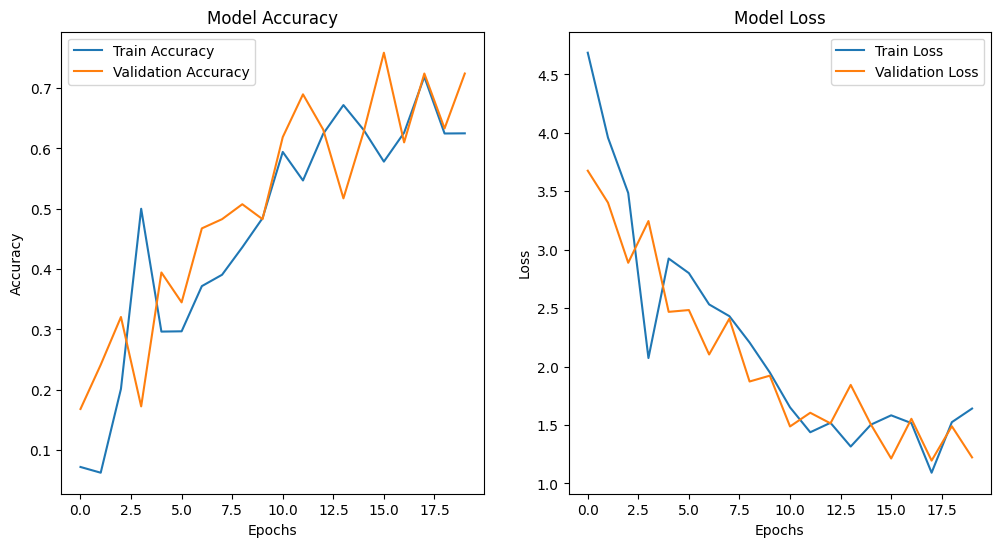

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.callbacks import LearningRateScheduler
from tqdm import tqdm
import matplotlib.pyplot as plt

# Ensure TensorFlow is using the GPU
print("GPU in use:", tf.test.gpu_device_name())

# Load pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))

# Freeze base model layers
base_model.trainable = False

# Build custom model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(1024, activation='relu'),
    layers.Dense(196, activation='softmax')  # Assuming 196 classes based on your labels
])

# Define a learning rate schedule
def lr_schedule(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * 0.1  # Reduce LR by a factor of 10 every 10 epochs

lr_scheduler = LearningRateScheduler(lr_schedule)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define a progress bar callback using tqdm
class TQDMProgressBar(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_bar = tqdm(total=steps_per_epoch, desc=f"Epoch {epoch + 1}/{epochs}", position=0, leave=True)

    def on_batch_end(self, batch, logs=None):
        self.epoch_bar.update(1)

    def on_epoch_end(self, epoch, logs=None):
        self.epoch_bar.close()

# Define the number of epochs
epochs = 20

# Training the model
steps_per_epoch = total_samples // batch_size
validation_steps = val_samples // batch_size

progress_bar = TQDMProgressBar()

history = model.fit(
    train_dataset,  # Training dataset
    epochs=epochs,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data,  # Validation dataset
    validation_steps=validation_steps,
    callbacks=[progress_bar, lr_scheduler],  # Add LearningRateScheduler here
    verbose=1
)

# Save the model after training
model.save('resnet50_custom_model.h5')

# Plotting accuracy and loss curves
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [ ]:
from google.colab import files
files.download('resnet50_custom_model.h5')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from tensorflow.keras.models import load_model
model = load_model(model_path)


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input
def prepare_image(img_path):
    img = image.load_img(img_path, target_size=(128, 128))  # Match target size used for training
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Batch size of 1
    img_array = preprocess_input(img_array)
    return img_array


img_path = test_path + '/00001.jpg'
img_array = prepare_image(img_path)

In [ ]:
predictions = model.predict(img_array)
class_idx = np.argmax(predictions, axis=1)[0]
mat_data = scipy.io.loadmat(mat_path)
class_names = mat_data['class_names'][0]
    # Get the predicted class name
predicted_class_name = class_names[class_idx][0]
predicted_class_name

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


'Audi S4 Sedan 2012'

In [ ]:
from tqdm import tqdm

# Define evaluation with progress bar
def evaluate_with_progress(model, dataset, steps):
    total_loss = 0
    total_accuracy = 0
    count = 0

    # Create a fresh iterator from the dataset:
    dataset_iter = iter(dataset)

    with tqdm(total=len(dataset), desc="Evaluating", position=0, leave=True) as pbar:
        for batch in range(len(dataset)):
            try:
                images, labels = next(dataset_iter)  # Get the next batch
                results = model.test_on_batch(images, labels)
                total_loss += results[0]  # Loss
                total_accuracy += results[1]  # Accuracy
                count += 1
            except StopIteration:
                # If the dataset is exhausted, break the loop
                break

            pbar.update(1)

    # Average the metrics over all batches
    avg_loss = total_loss / count if count else 0
    avg_accuracy = total_accuracy / count if count else 0
    return avg_loss, avg_accuracy

# Test dataset
test_dataset = create_dataset(test_annos, test_path, target_size, batch_size, augment=False)

# Evaluate the model with progress bar
test_loss, test_accuracy = evaluate_with_progress(model, test_dataset, len(test_dataset)) # Passing len(test_dataset) here as well

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")